In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

**ORGINAL**
---

In [ ]:
df_final= pd.read_csv("New_Energy_full_data_output.csv")
df_final



Date_time_name   Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  \
0      18/12/2017 7:08  142.514858  307.127571   184.840159            144   
1      18/12/2017 7:09  167.897946  229.573475   224.663707            128   
2      18/12/2017 7:10  136.482784  255.397285   179.659100            102   
3      18/12/2017 7:11  116.355628  411.906639   143.888836             81   
4      18/12/2017 7:12  100.714453  374.112452   132.224926             62   
...                ...         ...         ...          ...            ...   
8518  31/12/2017 18:41  364.838215  428.577004   379.603025            117   
8519  31/12/2017 18:42  109.978700  316.422802   168.295401             84   
8520  31/12/2017 18:45  129.602544  280.102096   149.525454             60   
8521  31/12/2017 18:46   89.445705  206.020283   124.016169             58   
8522  31/12/2017 18:47   91.765320  196.700586   125.546967             78   

      new_col  Optimal_Values        pred  
0       35530      142.514858  164.318169  
1       35531      167.897946  184.105941  
2       35532      136.482784  167.982449  
3       35533      116.355628  125.553027  
4       35534      100.714453  109.513316  
...       ...             ...         ...  
8518    44048      364.838215  420.972208  
8519    44049      109.978700  123.388201  
8520    44050      129.602544   89.523067  
8521    44051       89.445705   52.019528  
8522    44052       91.765320   79.063082  

[8523 rows x 8 columns]

In [ ]:
import matplotlib.pyplot as plt
#import mplfinance as mpf

df_final=df_final.set_index('Date_time_name')
df_final

Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  new_col  \
Date_time_name                                                                  
18/12/2017 7:08   142.514858  307.127571   184.840159            144    35530   
18/12/2017 7:09   167.897946  229.573475   224.663707            128    35531   
18/12/2017 7:10   136.482784  255.397285   179.659100            102    35532   
18/12/2017 7:11   116.355628  411.906639   143.888836             81    35533   
18/12/2017 7:12   100.714453  374.112452   132.224926             62    35534   
...                      ...         ...          ...            ...      ...   
31/12/2017 18:41  364.838215  428.577004   379.603025            117    44048   
31/12/2017 18:42  109.978700  316.422802   168.295401             84    44049   
31/12/2017 18:45  129.602544  280.102096   149.525454             60    44050   
31/12/2017 18:46   89.445705  206.020283   124.016169             58    44051   
31/12/2017 18:47   91.765320  196.700586   125.546967             78    44052   

                  Optimal_Values        pred  
Date_time_name                                
18/12/2017 7:08       142.514858  164.318169  
18/12/2017 7:09       167.897946  184.105941  
18/12/2017 7:10       136.482784  167.982449  
18/12/2017 7:11       116.355628  125.553027  
18/12/2017 7:12       100.714453  109.513316  
...                          ...         ...  
31/12/2017 18:41      364.838215  420.972208  
31/12/2017 18:42      109.978700  123.388201  
31/12/2017 18:45      129.602544   89.523067  
31/12/2017 18:46       89.445705   52.019528  
31/12/2017 18:47       91.765320   79.063082  

[8523 rows x 7 columns]

In [ ]:
#df_final=df_final[::2]

In [ ]:
df_final

Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  new_col  \
Date_time_name                                                                  
18/12/2017 7:08   142.514858  307.127571   184.840159            144    35530   
18/12/2017 7:09   167.897946  229.573475   224.663707            128    35531   
18/12/2017 7:10   136.482784  255.397285   179.659100            102    35532   
18/12/2017 7:11   116.355628  411.906639   143.888836             81    35533   
18/12/2017 7:12   100.714453  374.112452   132.224926             62    35534   
...                      ...         ...          ...            ...      ...   
31/12/2017 18:41  364.838215  428.577004   379.603025            117    44048   
31/12/2017 18:42  109.978700  316.422802   168.295401             84    44049   
31/12/2017 18:45  129.602544  280.102096   149.525454             60    44050   
31/12/2017 18:46   89.445705  206.020283   124.016169             58    44051   
31/12/2017 18:47   91.765320  196.700586   125.546967             78    44052   

                  Optimal_Values        pred  
Date_time_name                                
18/12/2017 7:08       142.514858  164.318169  
18/12/2017 7:09       167.897946  184.105941  
18/12/2017 7:10       136.482784  167.982449  
18/12/2017 7:11       116.355628  125.553027  
18/12/2017 7:12       100.714453  109.513316  
...                          ...         ...  
31/12/2017 18:41      364.838215  420.972208  
31/12/2017 18:42      109.978700  123.388201  
31/12/2017 18:45      129.602544   89.523067  
31/12/2017 18:46       89.445705   52.019528  
31/12/2017 18:47       91.765320   79.063082  

[8523 rows x 7 columns]

In [ ]:
pred=df_final['Pred_LSTM']
power=df_final['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)




Mean Absolute Error: 35.3897
Root Mean Square Error: 69.7574
Root Mean Square Error_LOG: 4.2450
Mean Square Error: 4866.0912
r_2 score:0.9492
MAPE score:6.9149



In [ ]:
pred=df_final['Pred_GRU']
power=df_final['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)


Mean Absolute Error: 71.4267
Root Mean Square Error: 105.4969
Root Mean Square Error_LOG: 4.6587
Mean Square Error: 11129.5933
r_2 score:0.8922
MAPE score:18.6286



In [ ]:
pred=df_final['Pred_BILSTM']
power=df_final['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)


Mean Absolute Error: 35.3843
Root Mean Square Error: 70.1714
Root Mean Square Error_LOG: 4.2509
Mean Square Error: 4924.0295
r_2 score:0.9436
MAPE score:8.2876



In [ ]:
pred=df_final['pred']
power=df_final['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 25.4608
Root Mean Square Error: 66.8102
Root Mean Square Error_LOG: 4.2019
Mean Square Error: 4463.5963
r_2 score:0.9526
MAPE score:5.6045



**LSTM at different intervals**
---

In [ ]:
df_finalf=df_final[::2]
pred=df_finalf['Pred_LSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 35.1620
Root Mean Square Error: 68.2207
Root Mean Square Error_LOG: 4.2227
Mean Square Error: 4654.0704
r_2 score:0.9514
MAPE score:6.9107



In [ ]:
df_finalf=df_final[::5]
pred=df_finalf['Pred_LSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 34.7039
Root Mean Square Error: 67.5057
Root Mean Square Error_LOG: 4.2122
Mean Square Error: 4557.0204
r_2 score:0.9526
MAPE score:6.8804



In [ ]:
df_finalt=df_final[::10]
pred=df_finalt['Pred_LSTM']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 34.4513
Root Mean Square Error: 64.8732
Root Mean Square Error_LOG: 4.1724
Mean Square Error: 4208.5302
r_2 score:0.9560
MAPE score:6.8902



In [ ]:
df_finalft=df_final[::15]
pred=df_finalft['Pred_LSTM']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 35.2815
Root Mean Square Error: 66.6136
Root Mean Square Error_LOG: 4.1989
Mean Square Error: 4437.3680
r_2 score:0.9546
MAPE score:7.0560



In [ ]:
df_finalhf=df_final[::30]
pred=df_finalhf['Pred_LSTM']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 38.1721
Root Mean Square Error: 72.4902
Root Mean Square Error_LOG: 4.2835
Mean Square Error: 5254.8267
r_2 score:0.9481
MAPE score:8.0749



In [ ]:
df_finalh=df_final[::60]
pred=df_finalh['Pred_LSTM']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 35.3996
Root Mean Square Error: 58.9564
Root Mean Square Error_LOG: 4.0768
Mean Square Error: 3475.8575
r_2 score:0.9652
MAPE score:7.4828



**BILSTM at different intervals**
---

In [ ]:
df_finalf=df_final[::2]
pred=df_finalf['Pred_BILSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 35.1272
Root Mean Square Error: 68.8493
Root Mean Square Error_LOG: 4.2319
Mean Square Error: 4740.2308
r_2 score:0.9458
MAPE score:8.2690



In [ ]:
df_finalf=df_final[::5]
pred=df_finalf['Pred_BILSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 34.7541
Root Mean Square Error: 67.7078
Root Mean Square Error_LOG: 4.2152
Mean Square Error: 4584.3431
r_2 score:0.9477
MAPE score:8.2205



In [ ]:
df_finalt=df_final[::10]
pred=df_finalt['Pred_BILSTM']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 34.2315
Root Mean Square Error: 64.8402
Root Mean Square Error_LOG: 4.1719
Mean Square Error: 4204.2458
r_2 score:0.9519
MAPE score:8.1283



In [ ]:
df_finalft=df_final[::15]
pred=df_finalft['Pred_BILSTM']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 34.9914
Root Mean Square Error: 66.9622
Root Mean Square Error_LOG: 4.2041
Mean Square Error: 4483.9360
r_2 score:0.9495
MAPE score:8.3373



In [ ]:
df_finalhf=df_final[::30]
pred=df_finalhf['Pred_BILSTM']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 37.1885
Root Mean Square Error: 72.3057
Root Mean Square Error_LOG: 4.2809
Mean Square Error: 5228.1123
r_2 score:0.9431
MAPE score:9.1060



In [ ]:
df_finalh=df_final[::60]
pred=df_finalh['Pred_BILSTM']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 33.5762
Root Mean Square Error: 61.0071
Root Mean Square Error_LOG: 4.1110
Mean Square Error: 3721.8673
r_2 score:0.9592
MAPE score:8.4236



**GRU at different intervals**
---

In [ ]:
df_finalf=df_final[::2]
pred=df_finalf['Pred_GRU']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 71.3281
Root Mean Square Error: 105.1883
Root Mean Square Error_LOG: 4.6558
Mean Square Error: 11064.5687
r_2 score:0.8925
MAPE score:20.3907



In [ ]:
df_finalf=df_final[::5]
pred=df_finalf['Pred_GRU']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 70.5169
Root Mean Square Error: 102.0423
Root Mean Square Error_LOG: 4.6254
Mean Square Error: 10412.6290
r_2 score:0.8987
MAPE score:19.1802



In [ ]:
df_finalt=df_final[::10]
pred=df_finalt['Pred_GRU']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 70.7050
Root Mean Square Error: 102.5456
Root Mean Square Error_LOG: 4.6303
Mean Square Error: 10515.6074
r_2 score:0.8969
MAPE score:16.8870



In [ ]:
df_finalft=df_final[::15]
pred=df_finalft['Pred_GRU']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 70.0604
Root Mean Square Error: 98.9903
Root Mean Square Error_LOG: 4.5950
Mean Square Error: 9799.0732
r_2 score:0.9057
MAPE score:15.4757



In [ ]:
df_finalhf=df_final[::30]
pred=df_finalhf['Pred_GRU']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 71.0478
Root Mean Square Error: 103.2442
Root Mean Square Error_LOG: 4.6371
Mean Square Error: 10659.3664
r_2 score:0.9004
MAPE score:20.0419



In [ ]:
df_finalh=df_final[::60]
pred=df_finalh['Pred_GRU']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 68.7656
Root Mean Square Error: 94.4311
Root Mean Square Error_LOG: 4.5479
Mean Square Error: 8917.2236
r_2 score:0.9128
MAPE score:22.7474



**Hybrid model at different intervals**
---

In [ ]:
df_finalf=df_final[::2]
pred=df_finalf['pred']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 25.4474
Root Mean Square Error: 65.9330
Root Mean Square Error_LOG: 4.1886
Mean Square Error: 4347.1654
r_2 score:0.9538
MAPE score:5.6231



In [ ]:
df_finalf=df_final[::5]
pred=df_finalf['pred']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 24.5559
Root Mean Square Error: 64.3130
Root Mean Square Error_LOG: 4.1638
Mean Square Error: 4136.1560
r_2 score:0.9563
MAPE score:5.4395



In [ ]:
df_finalt=df_final[::10]
pred=df_finalt['pred']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 24.7148
Root Mean Square Error: 63.0453
Root Mean Square Error_LOG: 4.1439
Mean Square Error: 3974.7062
r_2 score:0.9578
MAPE score:5.4903



In [ ]:
df_finalft=df_final[::15]
pred=df_finalft['pred']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 25.4023
Root Mean Square Error: 63.6340
Root Mean Square Error_LOG: 4.1531
Mean Square Error: 4049.2918
r_2 score:0.9578
MAPE score:5.6531



In [ ]:
df_finalhf=df_final[::30]
pred=df_finalhf['pred']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 28.6485
Root Mean Square Error: 71.9903
Root Mean Square Error_LOG: 4.2765
Mean Square Error: 5182.6103
r_2 score:0.9475
MAPE score:6.8361



In [ ]:
df_finalh=df_final[::60]
pred=df_finalh['pred']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 26.0094
Root Mean Square Error: 58.3276
Root Mean Square Error_LOG: 4.0661
Mean Square Error: 3402.1061
r_2 score:0.9648
MAPE score:6.1693



**7 days prediction**
---

In [ ]:
df= pd.read_csv("New_Energy_full_data_output.csv")
df

Date_time_name   Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  \
0      18/12/2017 7:08  142.514858  307.127571   184.840159            144   
1      18/12/2017 7:09  167.897946  229.573475   224.663707            128   
2      18/12/2017 7:10  136.482784  255.397285   179.659100            102   
3      18/12/2017 7:11  116.355628  411.906639   143.888836             81   
4      18/12/2017 7:12  100.714453  374.112452   132.224926             62   
...                ...         ...         ...          ...            ...   
8518  31/12/2017 18:41  364.838215  428.577004   379.603025            117   
8519  31/12/2017 18:42  109.978700  316.422802   168.295401             84   
8520  31/12/2017 18:45  129.602544  280.102096   149.525454             60   
8521  31/12/2017 18:46   89.445705  206.020283   124.016169             58   
8522  31/12/2017 18:47   91.765320  196.700586   125.546967             78   

      new_col  Optimal_Values        pred  
0       35530      142.514858  164.318169  
1       35531      167.897946  184.105941  
2       35532      136.482784  167.982449  
3       35533      116.355628  125.553027  
4       35534      100.714453  109.513316  
...       ...             ...         ...  
8518    44048      364.838215  420.972208  
8519    44049      109.978700  123.388201  
8520    44050      129.602544   89.523067  
8521    44051       89.445705   52.019528  
8522    44052       91.765320   79.063082  

[8523 rows x 8 columns]

In [ ]:
df.dtypes

Date_time_name     object
Pred_LSTM         float64
Pred_GRU          float64
Pred_BILSTM       float64
Actual_Values       int64
new_col             int64
Optimal_Values    float64
pred              float64
dtype: object

In [ ]:
!pip install mplfinance

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

df.set_index('Date_time_name')
df.index = pd.to_datetime(df.Date_time_name)
df=df.drop(['Date_time_name','new_col'], axis=1)
print(df)

                      Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  \
Date_time_name                                                            
2017-12-18 07:08:00  142.514858  307.127571   184.840159            144   
2017-12-18 07:09:00  167.897946  229.573475   224.663707            128   
2017-12-18 07:10:00  136.482784  255.397285   179.659100            102   
2017-12-18 07:11:00  116.355628  411.906639   143.888836             81   
2017-12-18 07:12:00  100.714453  374.112452   132.224926             62   
...                         ...         ...          ...            ...   
2017-12-31 18:41:00  364.838215  428.577004   379.603025            117   
2017-12-31 18:42:00  109.978700  316.422802   168.295401             84   
2017-12-31 18:45:00  129.602544  280.102096   149.525454             60   
2017-12-31 18:46:00   89.445705  206.020283   124.016169             58   
2017-12-31 18:47:00   91.765320  196.700586   125.546967             78   

                     Opt

**Hybrid model**

In [ ]:
pred=df['pred']
power=df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)


Mean Absolute Error: 25.4608
Root Mean Square Error: 66.8102
Root Mean Square Error_LOG: 4.2019
Mean Square Error: 4463.5963
r_2 score:0.9526
MAPE score:5.6045



In [ ]:
df_finalf=df[::5]
pred=df_finalf['pred']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 24.5559
Root Mean Square Error: 64.3130
Root Mean Square Error_LOG: 4.1638
Mean Square Error: 4136.1560
r_2 score:0.9563
MAPE score:5.4395



In [ ]:
df_finalt=df[::10]
pred=df_finalt['pred']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)


Mean Absolute Error: 24.7148
Root Mean Square Error: 63.0453
Root Mean Square Error_LOG: 4.1439
Mean Square Error: 3974.7062
r_2 score:0.9578
MAPE score:5.4903



In [ ]:
df_finalft=df[::15]
pred=df_finalft['pred']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 25.4023
Root Mean Square Error: 63.6340
Root Mean Square Error_LOG: 4.1531
Mean Square Error: 4049.2918
r_2 score:0.9578
MAPE score:5.6531



In [ ]:
df_finalhf=df[::30]
pred=df_finalhf['pred']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)


Mean Absolute Error: 28.6485
Root Mean Square Error: 71.9903
Root Mean Square Error_LOG: 4.2765
Mean Square Error: 5182.6103
r_2 score:0.9475
MAPE score:6.8361



In [ ]:
df_finalh=df[::60]
pred=df_finalh['pred']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 26.0094
Root Mean Square Error: 58.3276
Root Mean Square Error_LOG: 4.0661
Mean Square Error: 3402.1061
r_2 score:0.9648
MAPE score:6.1693



In [ ]:
df

Pred_LSTM    Pred_GRU  Pred_BILSTM  Actual_Values  \
Date_time_name                                                            
2017-12-18 07:08:00  142.514858  307.127571   184.840159            144   
2017-12-18 07:09:00  167.897946  229.573475   224.663707            128   
2017-12-18 07:10:00  136.482784  255.397285   179.659100            102   
2017-12-18 07:11:00  116.355628  411.906639   143.888836             81   
2017-12-18 07:12:00  100.714453  374.112452   132.224926             62   
...                         ...         ...          ...            ...   
2017-12-31 18:41:00  364.838215  428.577004   379.603025            117   
2017-12-31 18:42:00  109.978700  316.422802   168.295401             84   
2017-12-31 18:45:00  129.602544  280.102096   149.525454             60   
2017-12-31 18:46:00   89.445705  206.020283   124.016169             58   
2017-12-31 18:47:00   91.765320  196.700586   125.546967             78   

                     Optimal_Values        pred  
Date_time_name                                   
2017-12-18 07:08:00      142.514858  164.318169  
2017-12-18 07:09:00      167.897946  184.105941  
2017-12-18 07:10:00      136.482784  167.982449  
2017-12-18 07:11:00      116.355628  125.553027  
2017-12-18 07:12:00      100.714453  109.513316  
...                             ...         ...  
2017-12-31 18:41:00      364.838215  420.972208  
2017-12-31 18:42:00      109.978700  123.388201  
2017-12-31 18:45:00      129.602544   89.523067  
2017-12-31 18:46:00       89.445705   52.019528  
2017-12-31 18:47:00       91.765320   79.063082  

[8523 rows x 6 columns]

In [ ]:
df=df[:200]

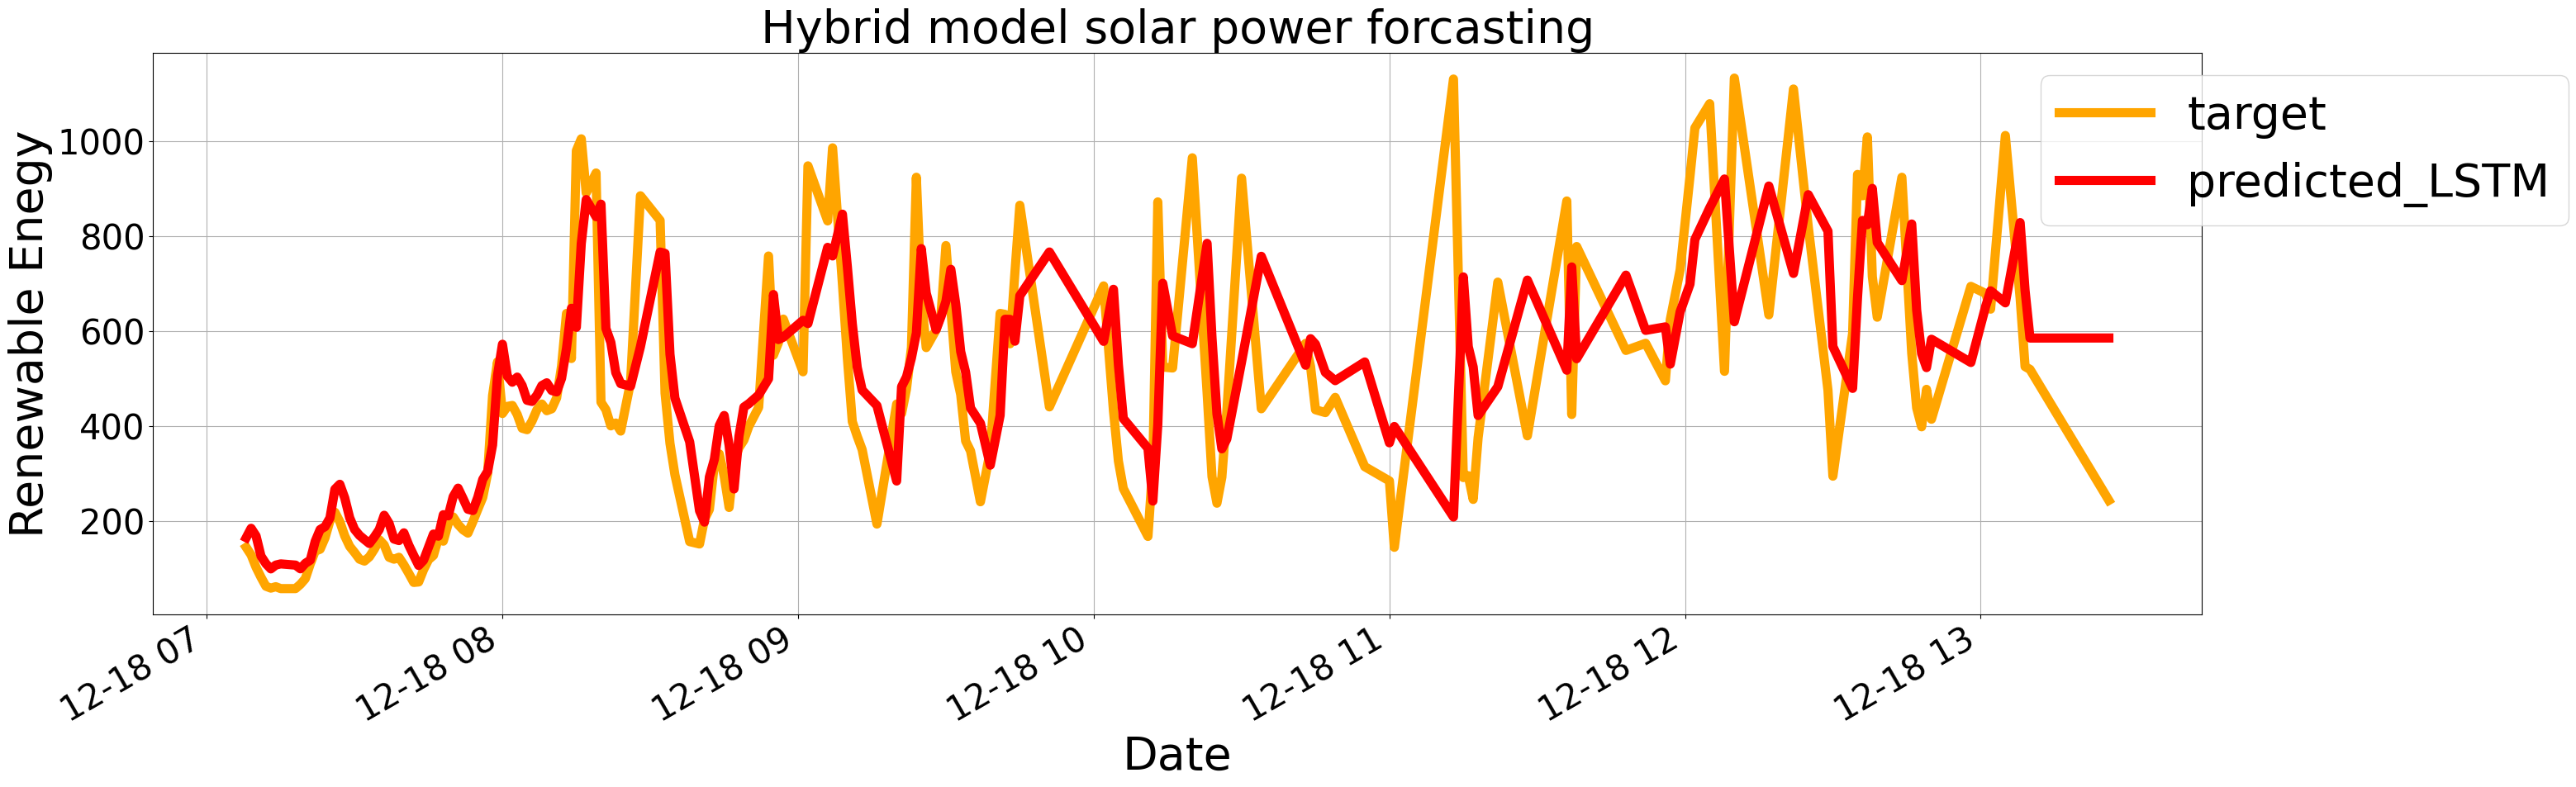

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=8,markersize=16)
predictedPlot1,=plt.plot(df.pred,label='predicted_LSTM',color='red',marker='.',linestyle='-',linewidth=8,markersize=16)
#predictedPlot2,=plt.plot(df.Pred_GRU,label='predicted_GRU',color='green',marker='.',linestyle=':',linewidth=8)
#predictedPlot2,=plt.plot(df.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=8)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot1],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
#plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

In [ ]:
df_finalf=df_finalf[100:500]
df_finalf.shape

(400, 6)

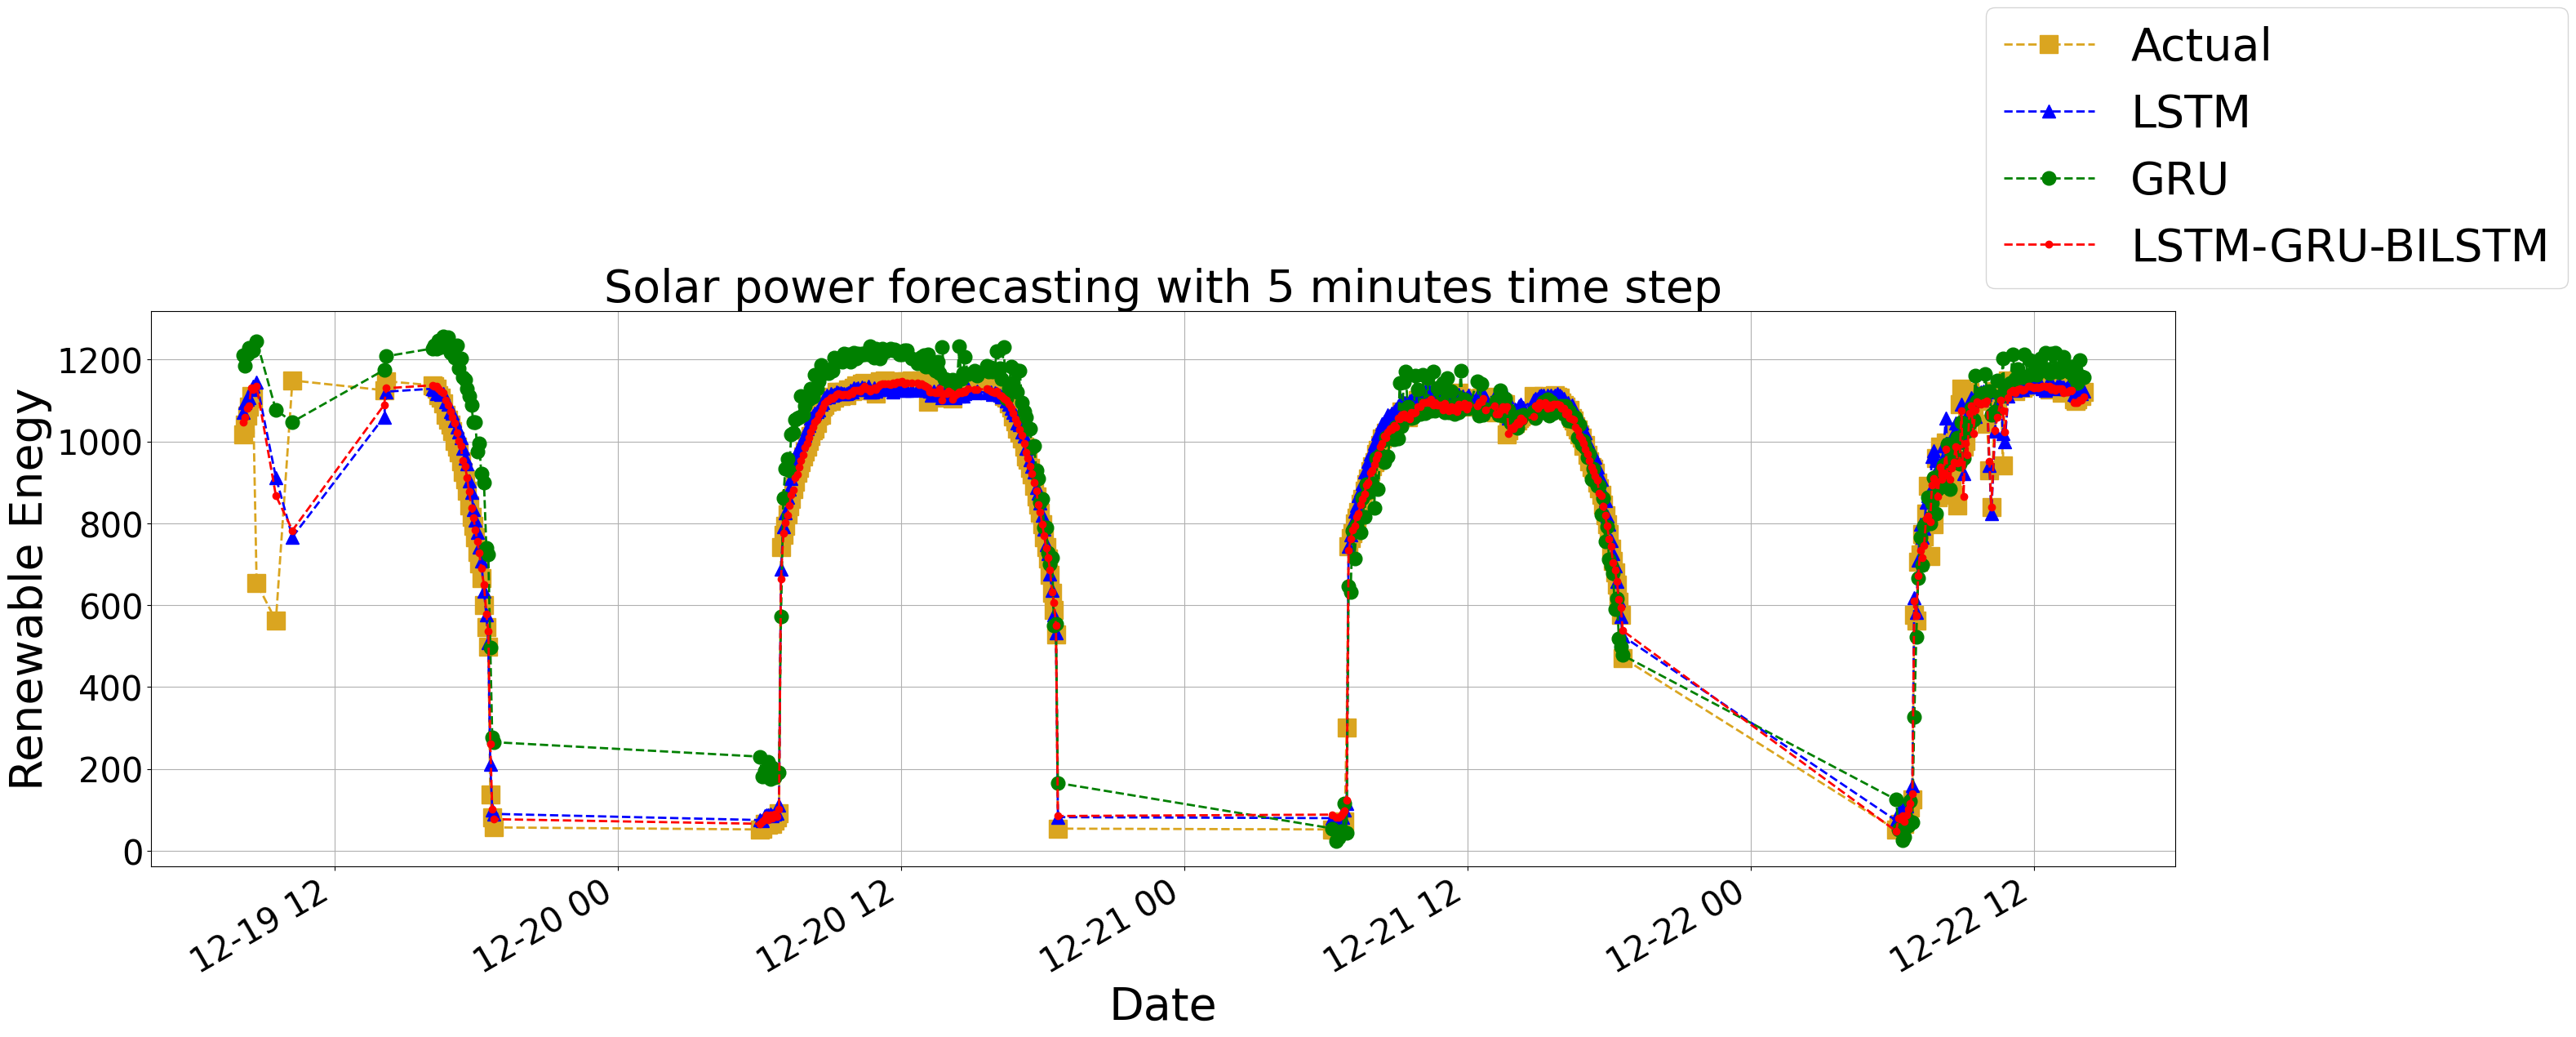

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalf.Actual_Values,label='Actual',color='goldenrod',marker='s',linestyle='--',linewidth=2,markersize=16)
predictedPlot,=plt.plot(df_finalf.Pred_LSTM,label='LSTM',color='blue',marker='^',linestyle='--',linewidth=2,markersize=12)
predictedPlot1,=plt.plot(df_finalf.Pred_GRU,label='GRU',color='green',marker='o',linestyle='--',linewidth=2,markersize=12)
predictedPlot2,=plt.plot(df_finalf.pred,label='LSTM-GRU-BILSTM',color='red',marker='.',linestyle='--',linewidth=2,markersize=12)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot, predictedPlot1, predictedPlot2],
           prop={'size': 40},
           bbox_to_anchor=(1.05, 1.0),  # Adjust these values as needed
           loc='lower center')
plt.title('Solar power forecasting with 5 minutes time step',fontsize=40,fontweight=40)
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

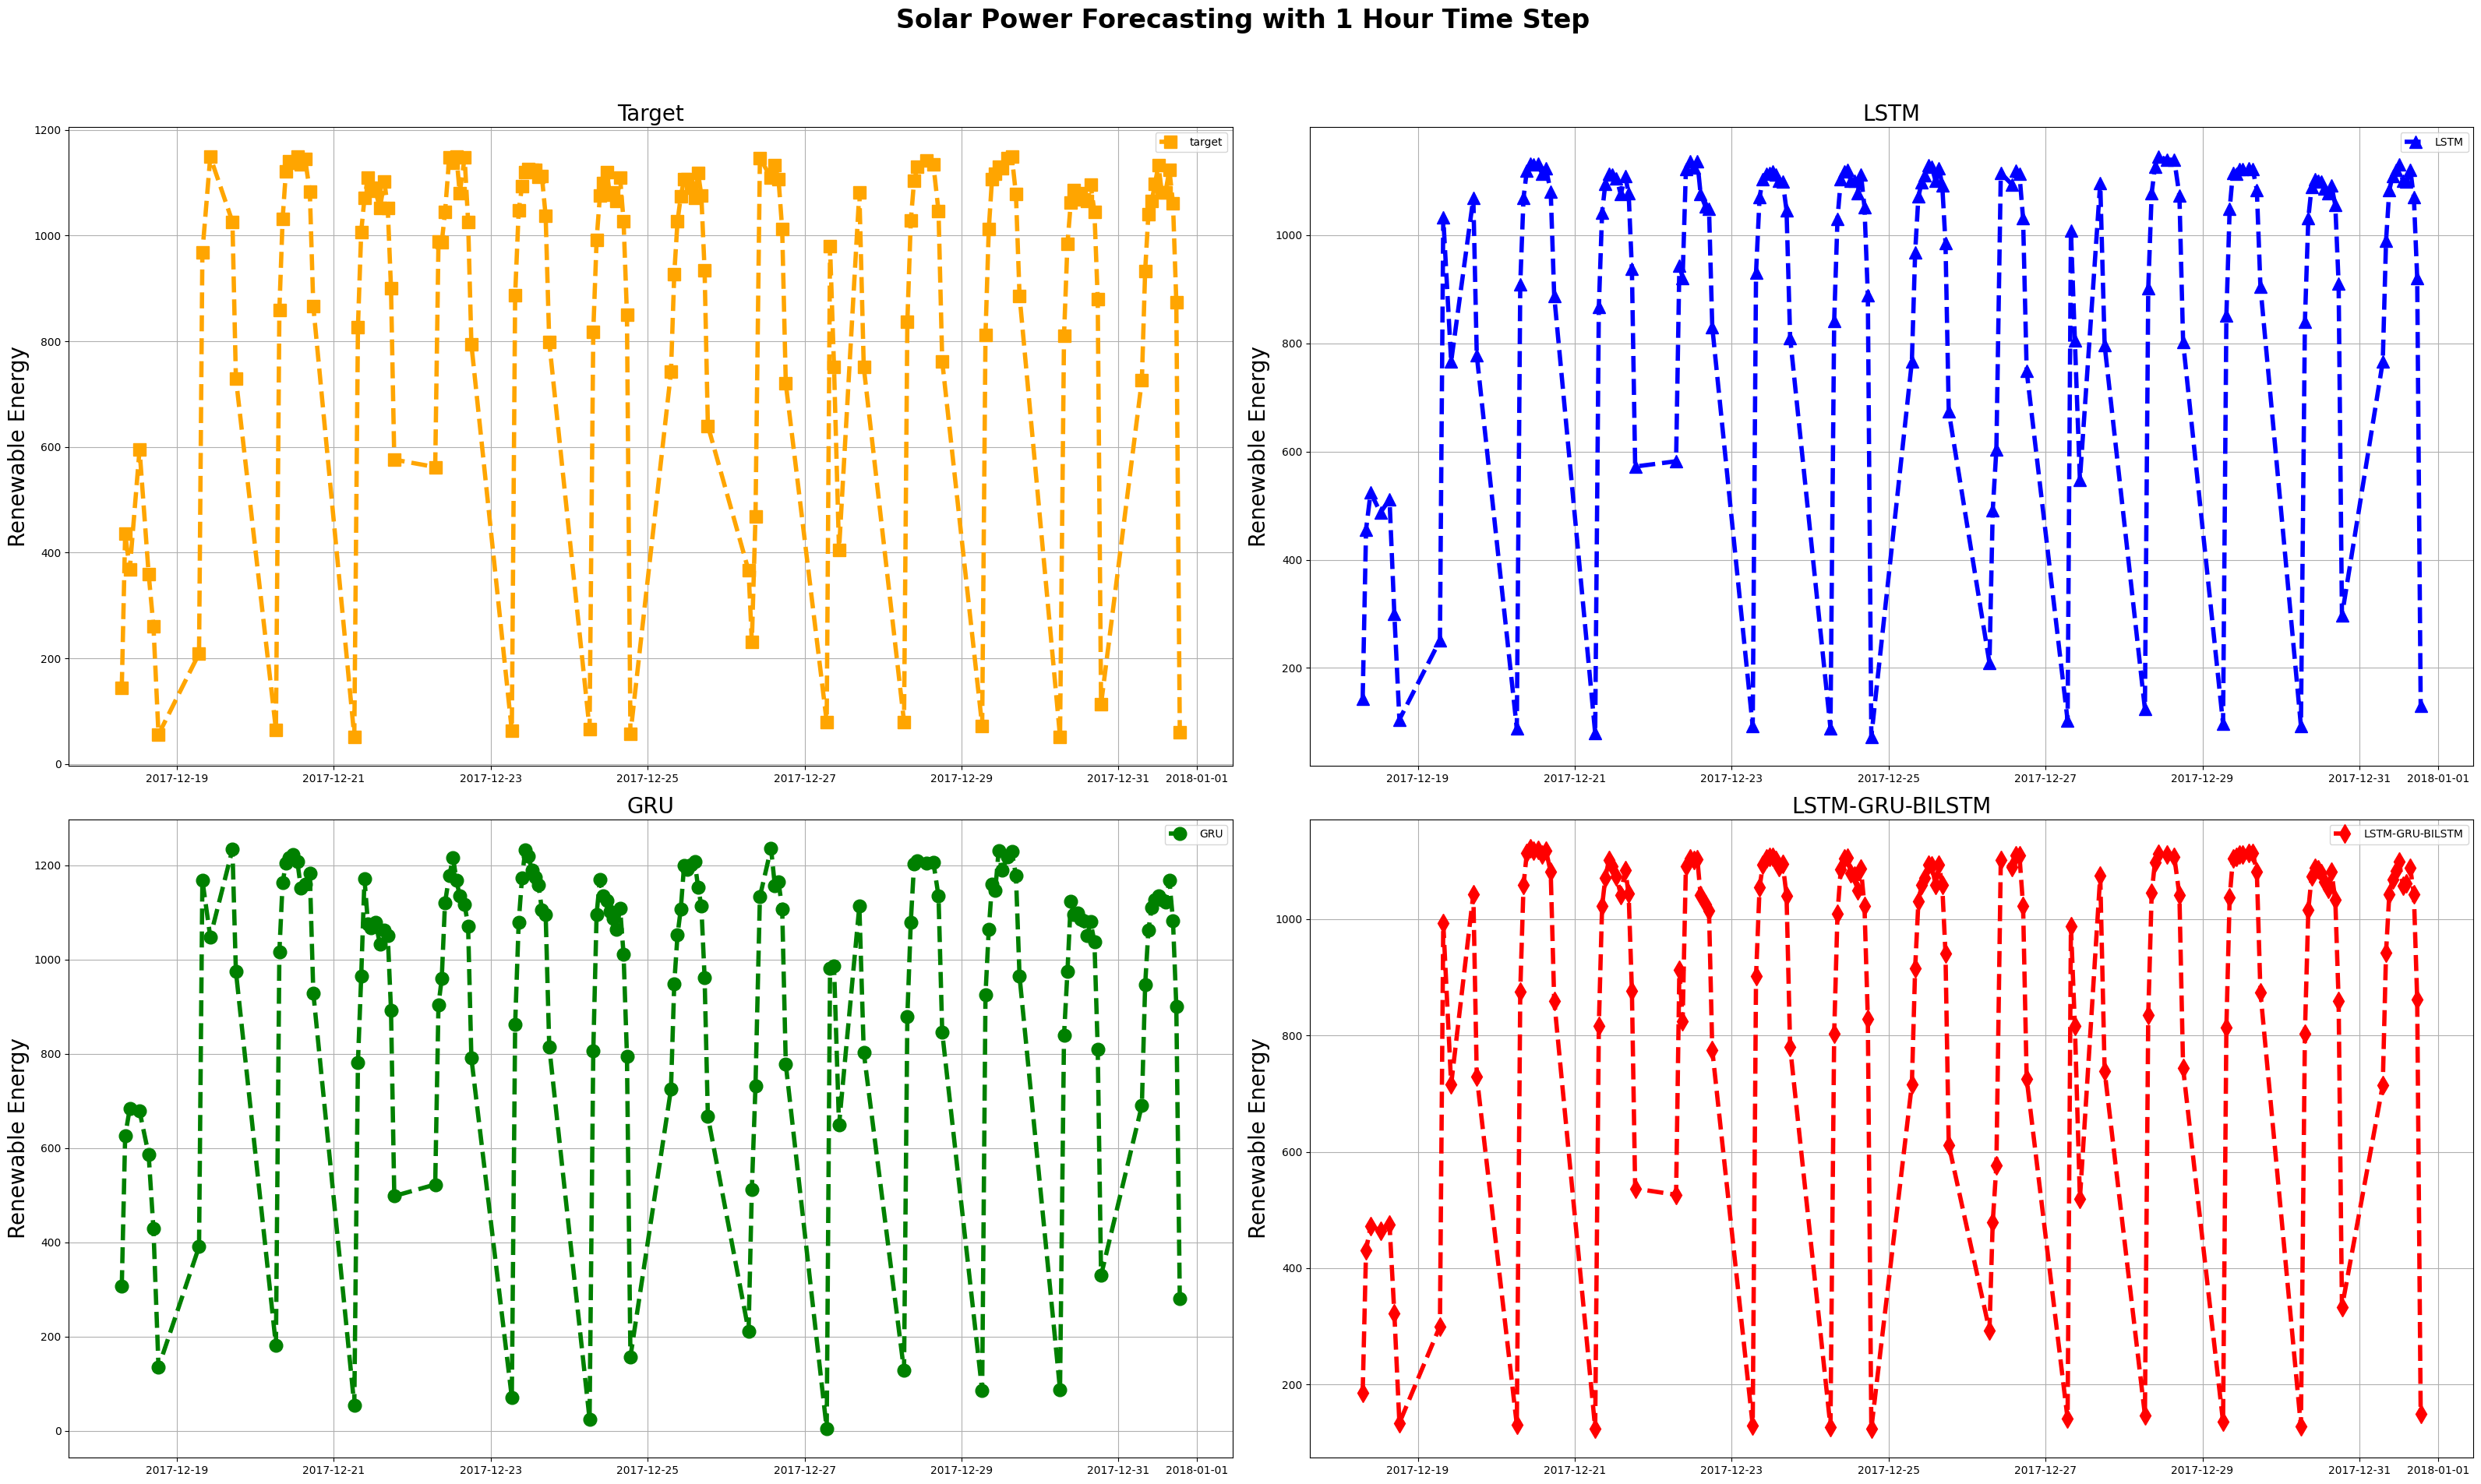

In [ ]:
import matplotlib.pyplot as plt

# Your data and plot settings here

plt.figure(figsize=(32, 20))  # Adjust the figure size as needed

# Creating subplots
plt.subplot(2, 2, 1)
plt.plot(df_finalh.Actual_Values, label='target', color='orange', marker='s', linestyle='--', linewidth=4, markersize=12)
plt.ylabel('Renewable Energy', fontsize=20)
plt.title('Target', fontsize=20)
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df_finalh.Pred_LSTM, label='LSTM', color='blue', marker='^', linestyle='--', linewidth=4, markersize=12)
plt.ylabel('Renewable Energy', fontsize=20)
plt.title('LSTM', fontsize=20)
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df_finalh.Pred_GRU, label='GRU', color='green', marker='o', linestyle='--', linewidth=4, markersize=12)
plt.ylabel('Renewable Energy', fontsize=20)
plt.title('GRU', fontsize=20)
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df_finalh.Pred_BILSTM, label='LSTM-GRU-BILSTM', color='red', marker='d', linestyle='--', linewidth=4, markersize=12)
plt.ylabel('Renewable Energy', fontsize=20)
plt.title('LSTM-GRU-BILSTM', fontsize=20)
plt.grid()
plt.legend()

plt.suptitle('Solar Power Forecasting with 1 Hour Time Step', fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing between subplots

# Save the figure
plt.savefig('path_to_save_figure.png')

plt.show()


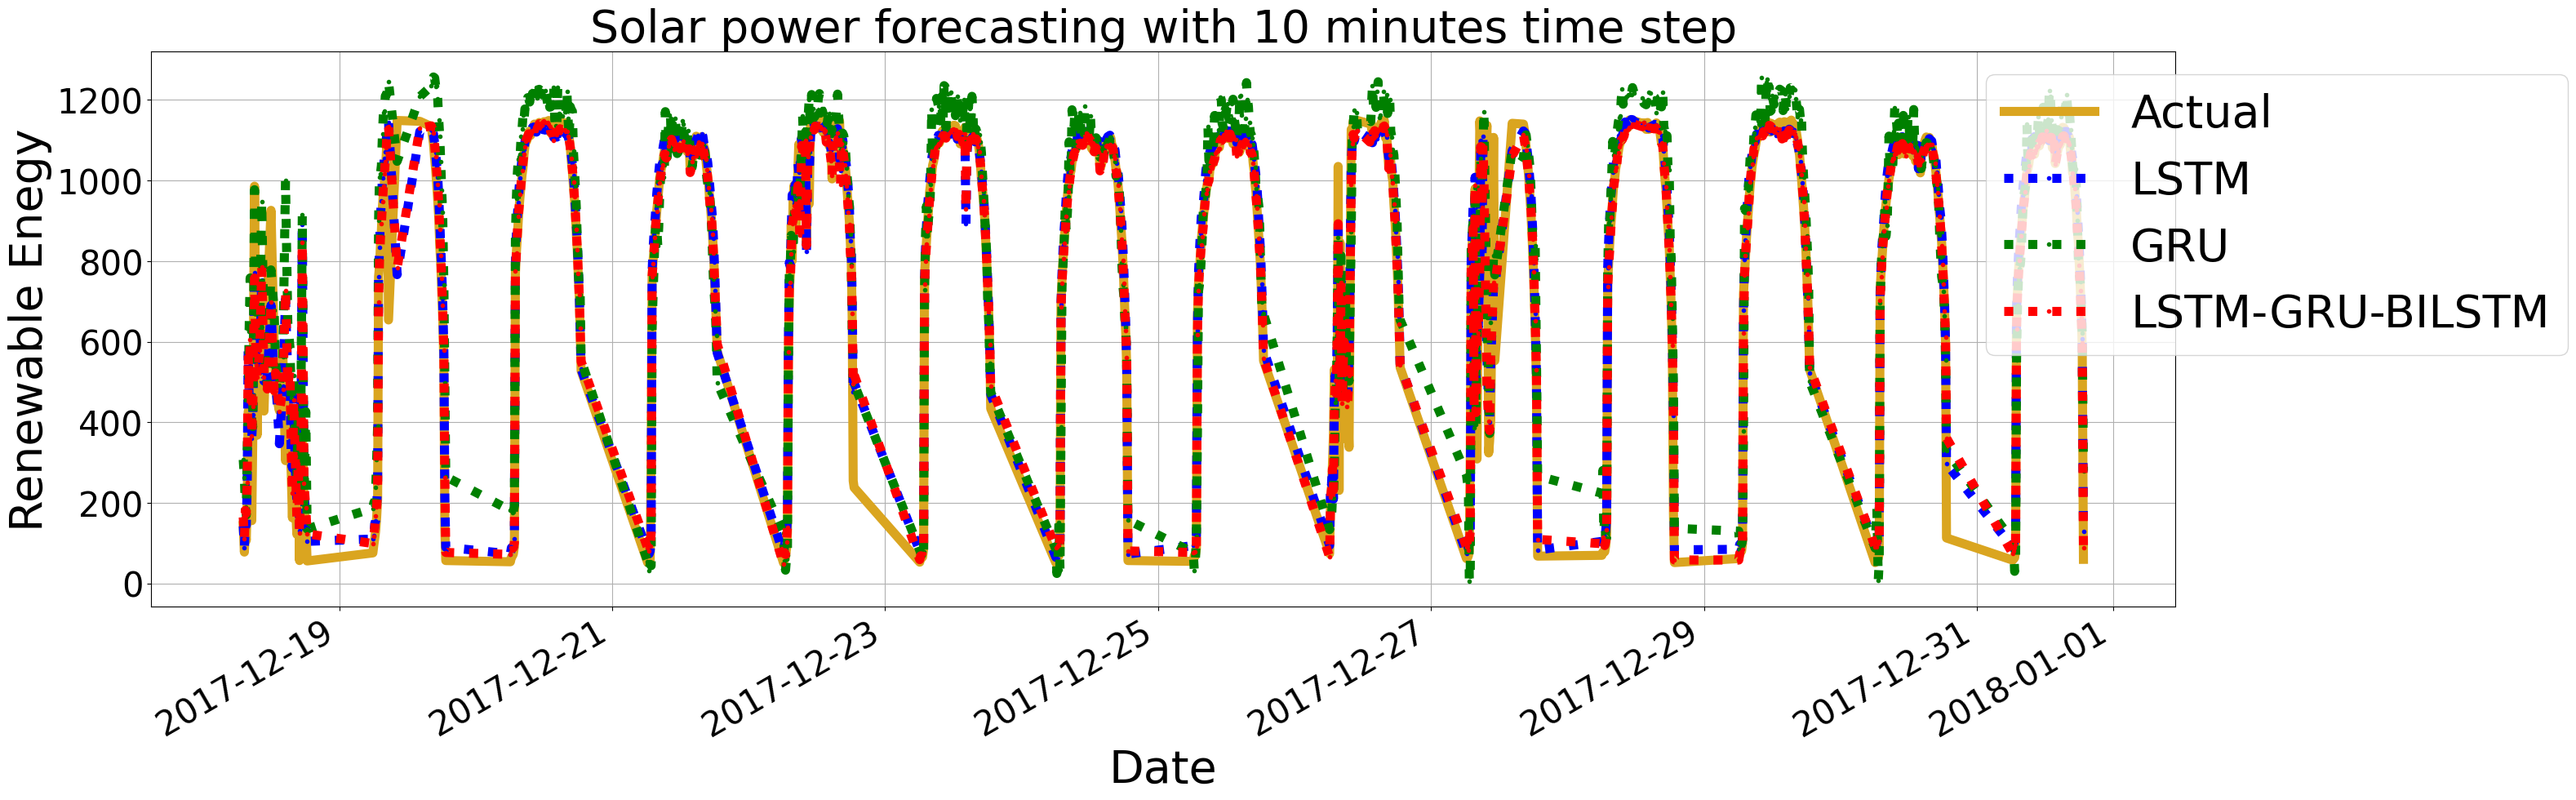

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalt.Actual_Values,label='Actual',color='goldenrod',marker='.',linestyle='-',linewidth=8)
predictedPlot,=plt.plot(df_finalt.Pred_LSTM,label='LSTM',color='blue',marker='.',linestyle=':',linewidth=8)
predictedPlot1,=plt.plot(df_finalt.Pred_GRU,label='GRU',color='green',marker='.',linestyle=':',linewidth=8)
predictedPlot2,=plt.plot(df_finalt.pred,label='LSTM-GRU-BILSTM',color='red',marker='.',linestyle=':',linewidth=8)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot, predictedPlot1, predictedPlot2],
           prop={'size': 40},
           bbox_to_anchor=(1.05, 1.0),  # Adjust these values as needed
           loc='upper center')
plt.title('Solar power forecasting with 10 minutes time step',fontsize=40,fontweight=40)
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

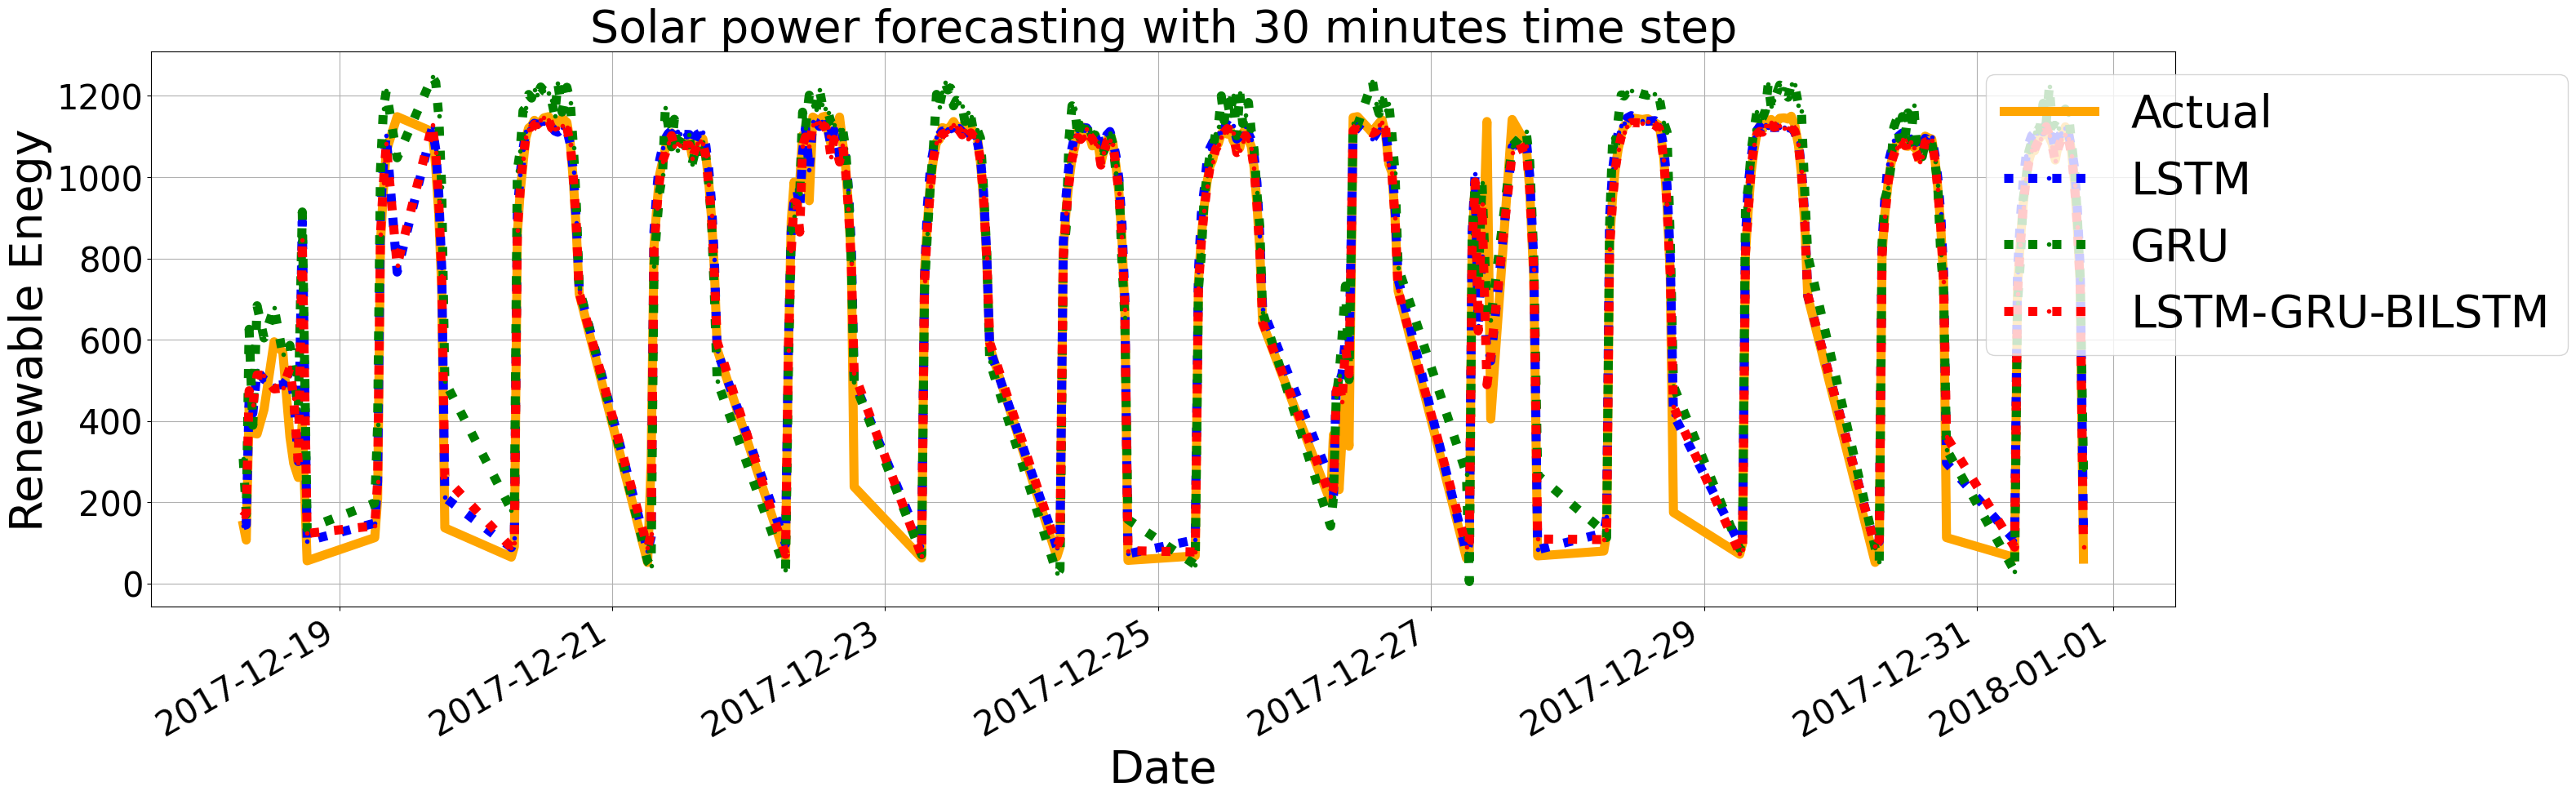

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalhf.Actual_Values,label='Actual',color='orange',marker='.',linestyle='-',linewidth=8)
predictedPlot,=plt.plot(df_finalhf.Pred_LSTM,label='LSTM',color='blue',marker='.',linestyle=':',linewidth=8)
predictedPlot2,=plt.plot(df_finalhf.Pred_GRU,label='GRU',color='green',marker='.',linestyle=':',linewidth=8)
predictedPlot3,=plt.plot(df_finalhf.pred,label='LSTM-GRU-BILSTM',color='red',marker='.',linestyle=':',linewidth=8)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot, predictedPlot2, predictedPlot3],
           prop={'size': 40},
           bbox_to_anchor=(1.05, 1.0),  # Adjust these values as needed
           loc='upper center')
plt.title('Solar power forecasting with 30 minutes time step',fontsize=40,fontweight=40)
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

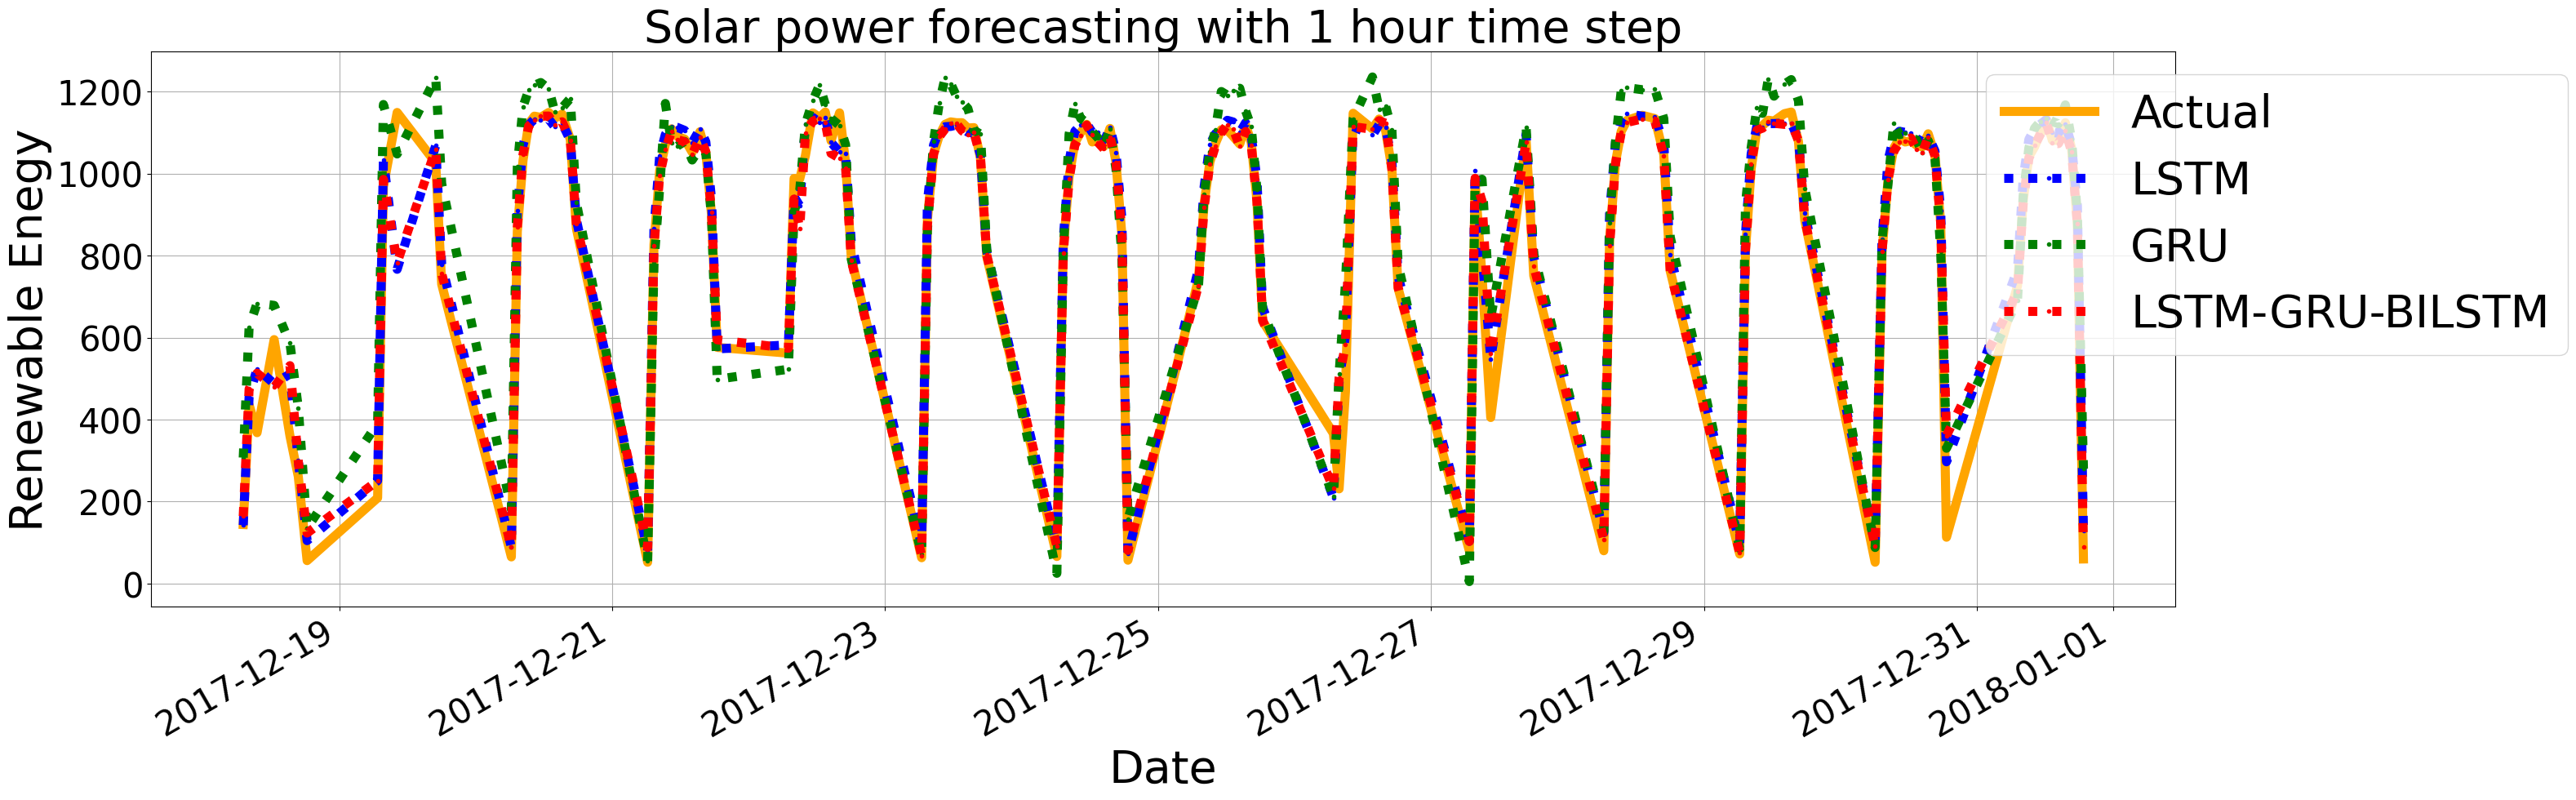

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='Actual',color='orange',marker='.',linestyle='-',linewidth=8)
predictedPlot,=plt.plot(df_finalh.Pred_LSTM,label='LSTM',color='blue',marker='.',linestyle=':',linewidth=8)
predictedPlot2,=plt.plot(df_finalh.Pred_GRU,label='GRU',color='green',marker='.',linestyle=':',linewidth=8)
predictedPlot3,=plt.plot(df_finalh.pred,label='LSTM-GRU-BILSTM',color='red',marker='.',linestyle=':',linewidth=8)
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot, predictedPlot2, predictedPlot3],
           prop={'size': 40},
           bbox_to_anchor=(1.05, 1.0),  # Adjust these values as needed
           loc='upper center')
plt.title('Solar power forecasting with 1 hour time step',fontsize=40,fontweight=40)
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

**LSTM at different intervals_interval**
---

In [ ]:
df_finalf=df[::5]
pred=df_finalf['Pred_LSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

NameError: ignored

In [ ]:
df_finalt=df[::10]
pred=df_finalt['Pred_LSTM']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)



Mean Absolute Error: 29.8274
Root Mean Square Error: 48.9566
Root Mean Square Error_LOG: 3.8909
Mean Square Error: 2396.7447
r_2 score:0.9711
MAPE score:5.3687



In [ ]:
df_finalft=df[::15]
pred=df_finalft['Pred_LSTM']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 31.7421
Root Mean Square Error: 61.1924
Root Mean Square Error_LOG: 4.1140
Mean Square Error: 3744.5079
r_2 score:0.9538
MAPE score:5.9495



In [ ]:
df_finalhf=df[::30]
pred=df_finalhf['Pred_LSTM']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

0.9770&5.0474&42.1766&28.311

Mean Absolute Error: 28.3114
Root Mean Square Error: 42.1766
Root Mean Square Error_LOG: 3.7419
Mean Square Error: 1778.8633
r_2 score:0.9770
MAPE score:5.0474



In [ ]:
df_finalh=df[::60]
pred=df_finalh['Pred_LSTM']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)
0.9753&5.2229&44.1932&29.6850

Mean Absolute Error: 29.6850
Root Mean Square Error: 44.1932
Root Mean Square Error_LOG: 3.7886
Mean Square Error: 1953.0349
r_2 score:0.9753
MAPE score:5.2229



In [ ]:
df_finalh

Actual_Values    Pred_LSTM  Pred_BILSTM     Pred_GRU  \
Date_time_name                                                              
2017-12-19 06:58:00            742   793.141601   731.022011   731.022011   
2017-12-19 07:59:00            998  1064.501167  1028.437243  1028.437243   
2017-12-19 16:02:00           1146  1132.968503  1109.993954  1132.968503   
2017-12-19 17:12:00            979  1031.552029   993.521957   993.521957   
2017-12-19 18:14:00            645   691.733774   636.819789   636.819789   
...                            ...          ...          ...          ...   
2017-12-31 13:30:00           1094  1106.008861  1072.136947  1106.008861   
2017-12-31 14:33:00           1096  1107.899219  1071.189803  1107.899219   
2017-12-31 15:48:00           1110  1115.798266  1085.992213  1115.798266   
2017-12-31 16:52:00           1021  1042.663401  1007.677238  1007.677238   
2017-12-31 17:53:00            837   867.919279   800.436425   838.663014   

                            pred  
Date_time_name                    
2017-12-19 06:58:00   755.620965  
2017-12-19 07:59:00  1029.282526  
2017-12-19 16:02:00  1131.839647  
2017-12-19 17:12:00  1014.234732  
2017-12-19 18:14:00   678.836133  
...                          ...  
2017-12-31 13:30:00  1089.397189  
2017-12-31 14:33:00  1092.123135  
2017-12-31 15:48:00  1105.461366  
2017-12-31 16:52:00  1033.083417  
2017-12-31 17:53:00   861.830739  

[135 rows x 5 columns]

<ipython-input-56-2282604312b8>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


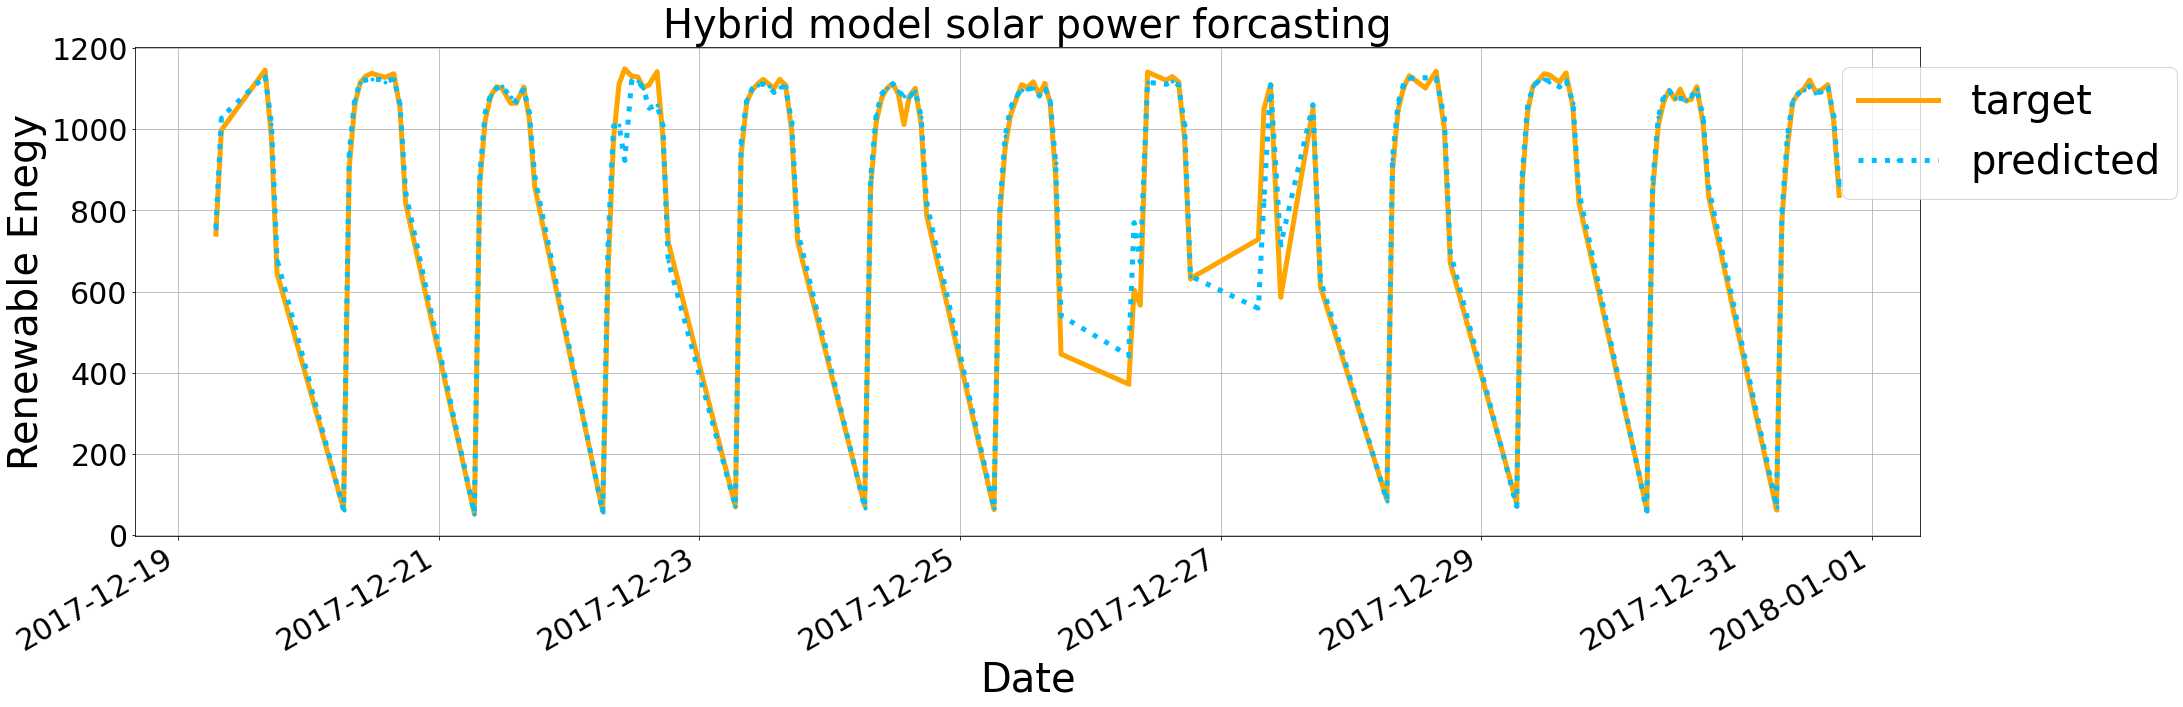

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-57-8fd6a6349060>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


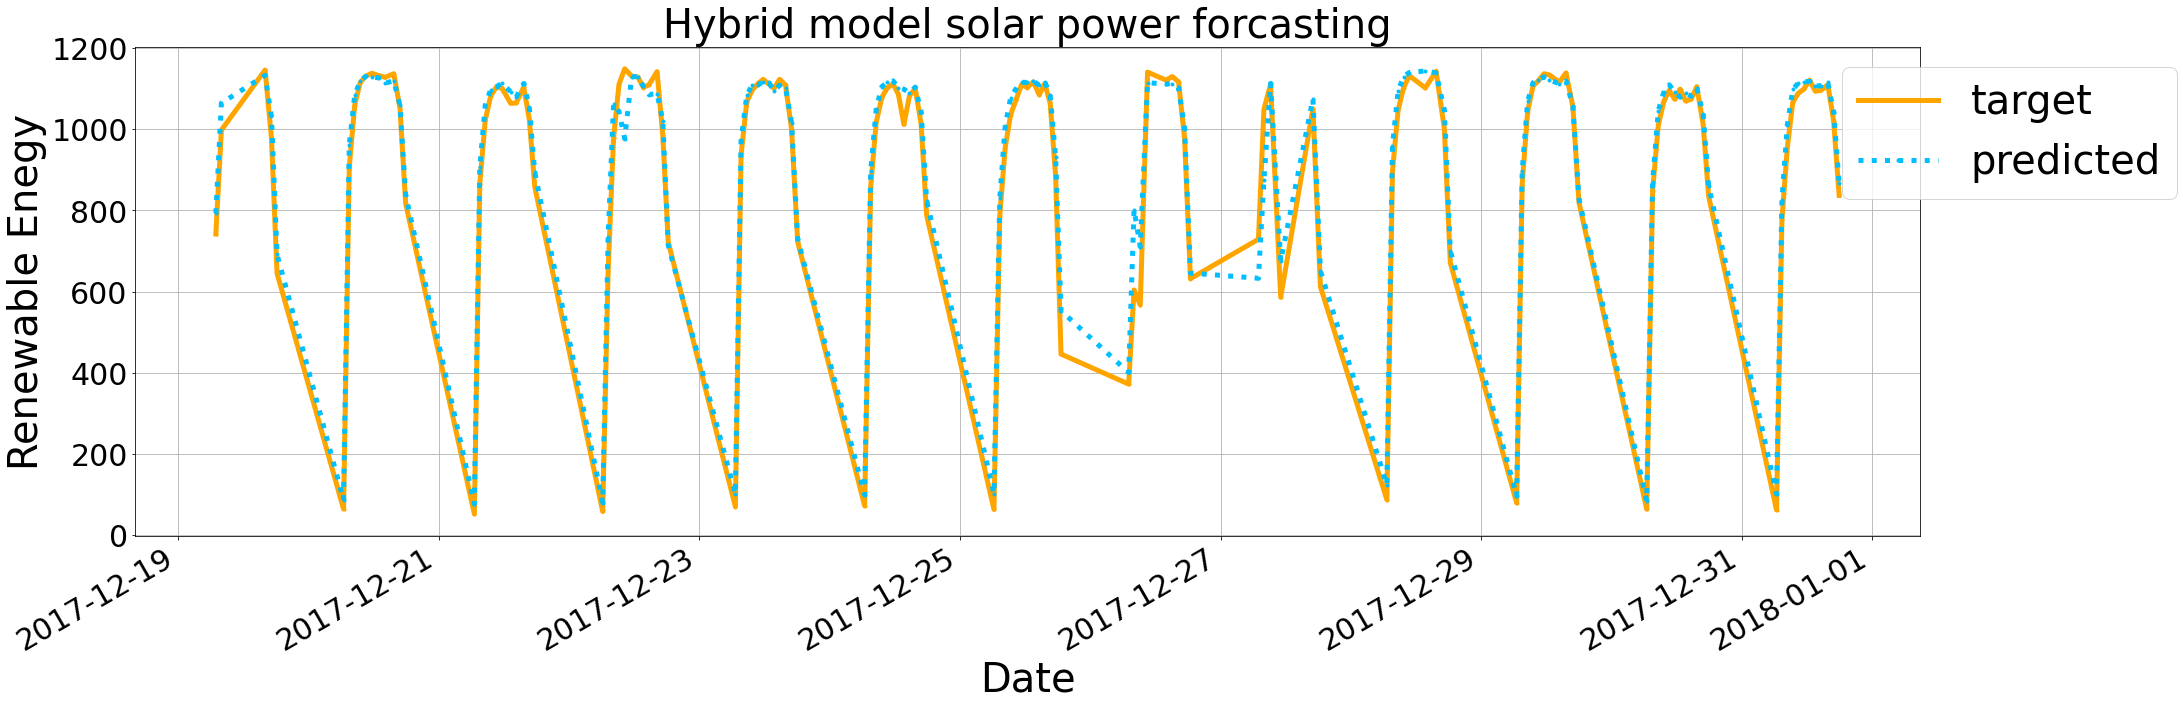

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.Pred_LSTM,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-58-84d0d3a390d8>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


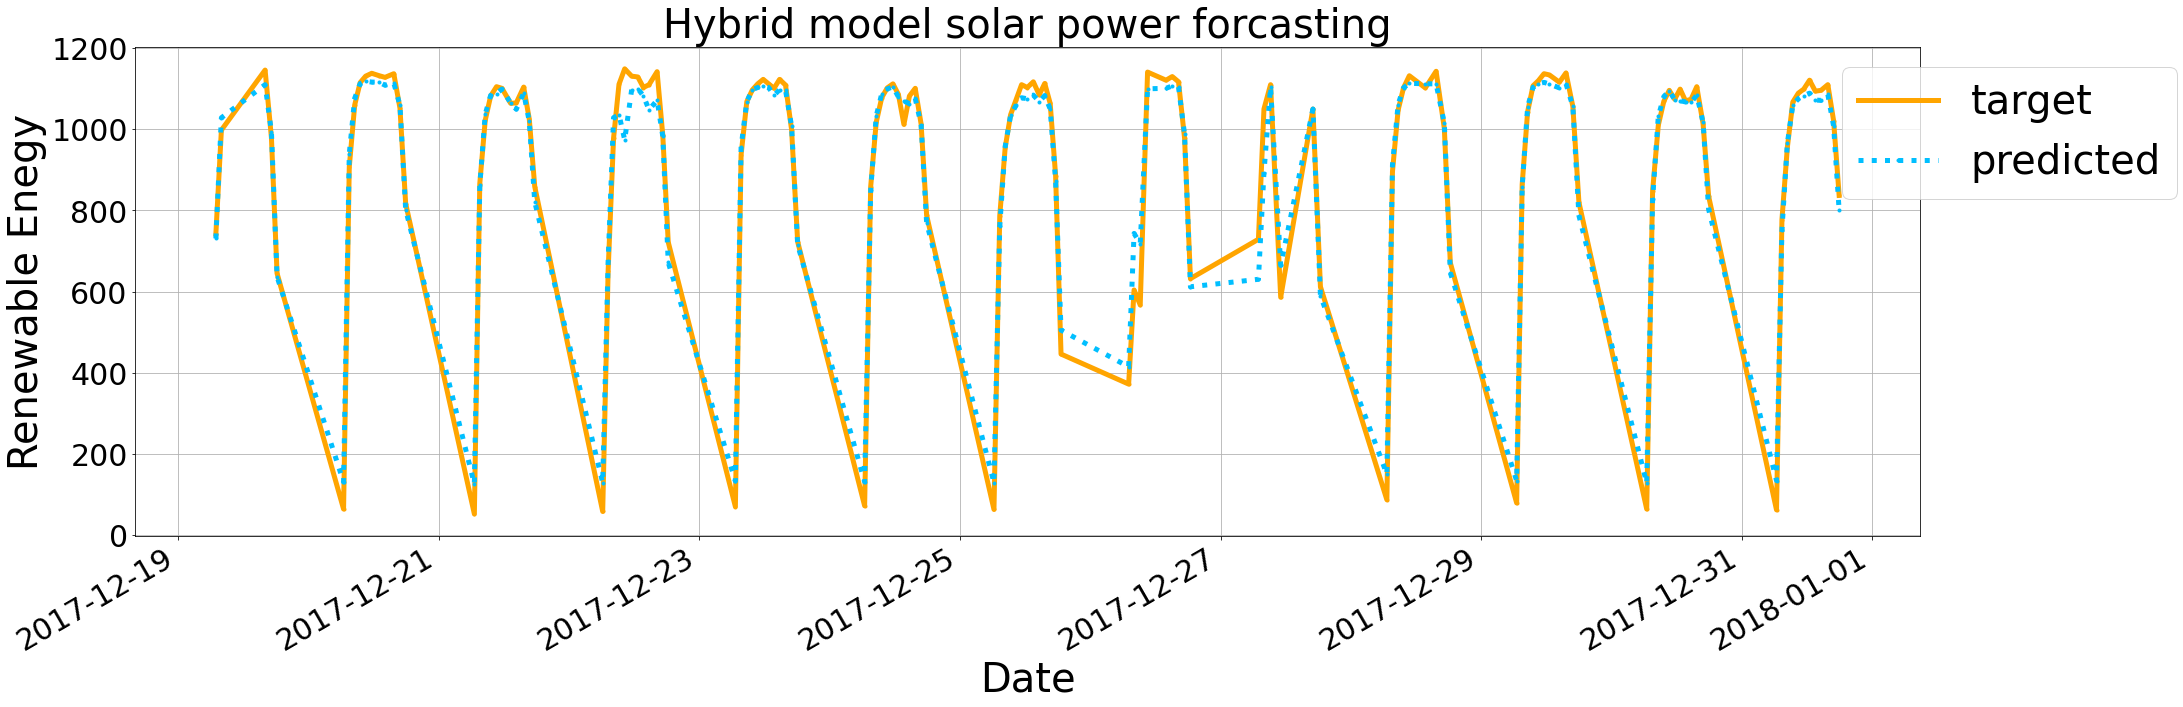

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.Pred_BILSTM,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-59-3ef51c03a102>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


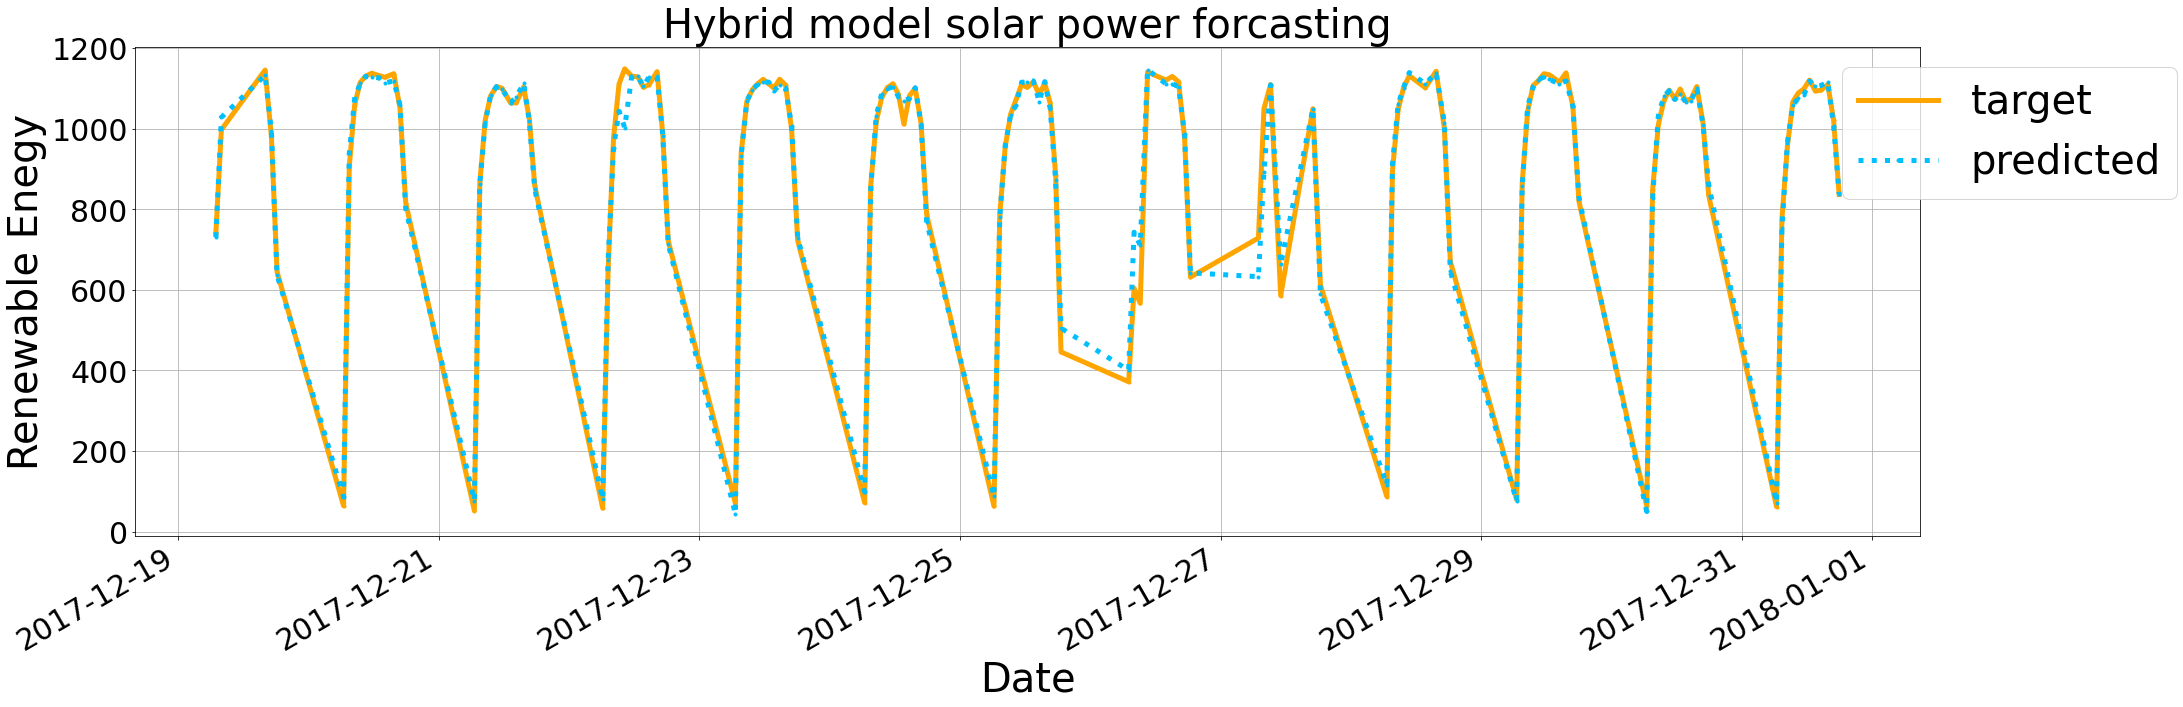

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.Pred_GRU,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

**BI-LSTM at different intervals_interval**
---

In [ ]:
df_finalf=df[::5]
pred=df_finalf['Pred_BILSTM']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)



Mean Absolute Error: 29.8214
Root Mean Square Error: 58.2548
Root Mean Square Error_LOG: 4.0648
Mean Square Error: 3393.6189
r_2 score:0.9557
MAPE score:6.7926



In [ ]:
df_finalt=df[::10]
pred=df_finalt['Pred_BILSTM']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)



Mean Absolute Error: 28.1143
Root Mean Square Error: 48.0720
Root Mean Square Error_LOG: 3.8727
Mean Square Error: 2310.9220
r_2 score:0.9697
MAPE score:6.4111



In [ ]:
df_finalft=df[::15]
pred=df_finalft['Pred_BILSTM']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 30.9784
Root Mean Square Error: 61.6324
Root Mean Square Error_LOG: 4.1212
Mean Square Error: 3798.5523
r_2 score:0.9490
MAPE score:7.0180



In [ ]:
df_finalhf=df[::30]
pred=df_finalhf['Pred_BILSTM']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)



Mean Absolute Error: 27.0522
Root Mean Square Error: 42.5280
Root Mean Square Error_LOG: 3.7502
Mean Square Error: 1808.6348
r_2 score:0.9746
MAPE score:6.0690



In [ ]:
df_finalh=df[::60]
pred=df_finalh['Pred_BILSTM']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

0.9774&6.1888&40.6768&27.1264

Mean Absolute Error: 27.1264
Root Mean Square Error: 40.6768
Root Mean Square Error_LOG: 3.7057
Mean Square Error: 1654.5988
r_2 score:0.9774
MAPE score:6.1888



In [ ]:
df_finalh

Actual_Values    Pred_LSTM  Pred_BILSTM     Pred_GRU  \
Date_time_name                                                              
2017-12-19 06:58:00            742   793.141601   731.022011   731.022011   
2017-12-19 07:59:00            998  1064.501167  1028.437243  1028.437243   
2017-12-19 16:02:00           1146  1132.968503  1109.993954  1132.968503   
2017-12-19 17:12:00            979  1031.552029   993.521957   993.521957   
2017-12-19 18:14:00            645   691.733774   636.819789   636.819789   
...                            ...          ...          ...          ...   
2017-12-31 13:30:00           1094  1106.008861  1072.136947  1106.008861   
2017-12-31 14:33:00           1096  1107.899219  1071.189803  1107.899219   
2017-12-31 15:48:00           1110  1115.798266  1085.992213  1115.798266   
2017-12-31 16:52:00           1021  1042.663401  1007.677238  1007.677238   
2017-12-31 17:53:00            837   867.919279   800.436425   838.663014   

                            pred  
Date_time_name                    
2017-12-19 06:58:00   755.620965  
2017-12-19 07:59:00  1029.282526  
2017-12-19 16:02:00  1131.839647  
2017-12-19 17:12:00  1014.234732  
2017-12-19 18:14:00   678.836133  
...                          ...  
2017-12-31 13:30:00  1089.397189  
2017-12-31 14:33:00  1092.123135  
2017-12-31 15:48:00  1105.461366  
2017-12-31 16:52:00  1033.083417  
2017-12-31 17:53:00   861.830739  

[135 rows x 5 columns]

**GRU at different intervals_interval**
---

In [ ]:
df_finalf=df[::5]
pred=df_finalf['Pred_GRU']
power=df_finalf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 17.8530
Root Mean Square Error: 46.8731
Root Mean Square Error_LOG: 3.8474
Mean Square Error: 2197.0878
r_2 score:0.9740
MAPE score:4.0457



In [ ]:
df_finalt=df[::10]
pred=df_finalt['Pred_GRU']
power=df_finalt['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)



Mean Absolute Error: 17.0331
Root Mean Square Error: 37.0500
Root Mean Square Error_LOG: 3.6123
Mean Square Error: 1372.6997
r_2 score:0.9837
MAPE score:3.8044



In [ ]:
df_finalft=df[::15]
pred=df_finalft['Pred_GRU']
power=df_finalft['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 18.7588
Root Mean Square Error: 48.3101
Root Mean Square Error_LOG: 3.8776
Mean Square Error: 2333.8698
r_2 score:0.9714
MAPE score:4.1711



In [ ]:
df_finalhf=df[::30]
pred=df_finalhf['Pred_GRU']
power=df_finalhf['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 16.6519
Root Mean Square Error: 31.2205
Root Mean Square Error_LOG: 3.4411
Mean Square Error: 974.7223
r_2 score:0.9875
MAPE score:3.8136



In [ ]:
df_finalh=df[::60]
pred=df_finalh['Pred_GRU']
power=df_finalh['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 16.5356
Root Mean Square Error: 31.4744
Root Mean Square Error_LOG: 3.4492
Mean Square Error: 990.6362
r_2 score:0.9878
MAPE score:3.7841



<ipython-input-56-2282604312b8>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


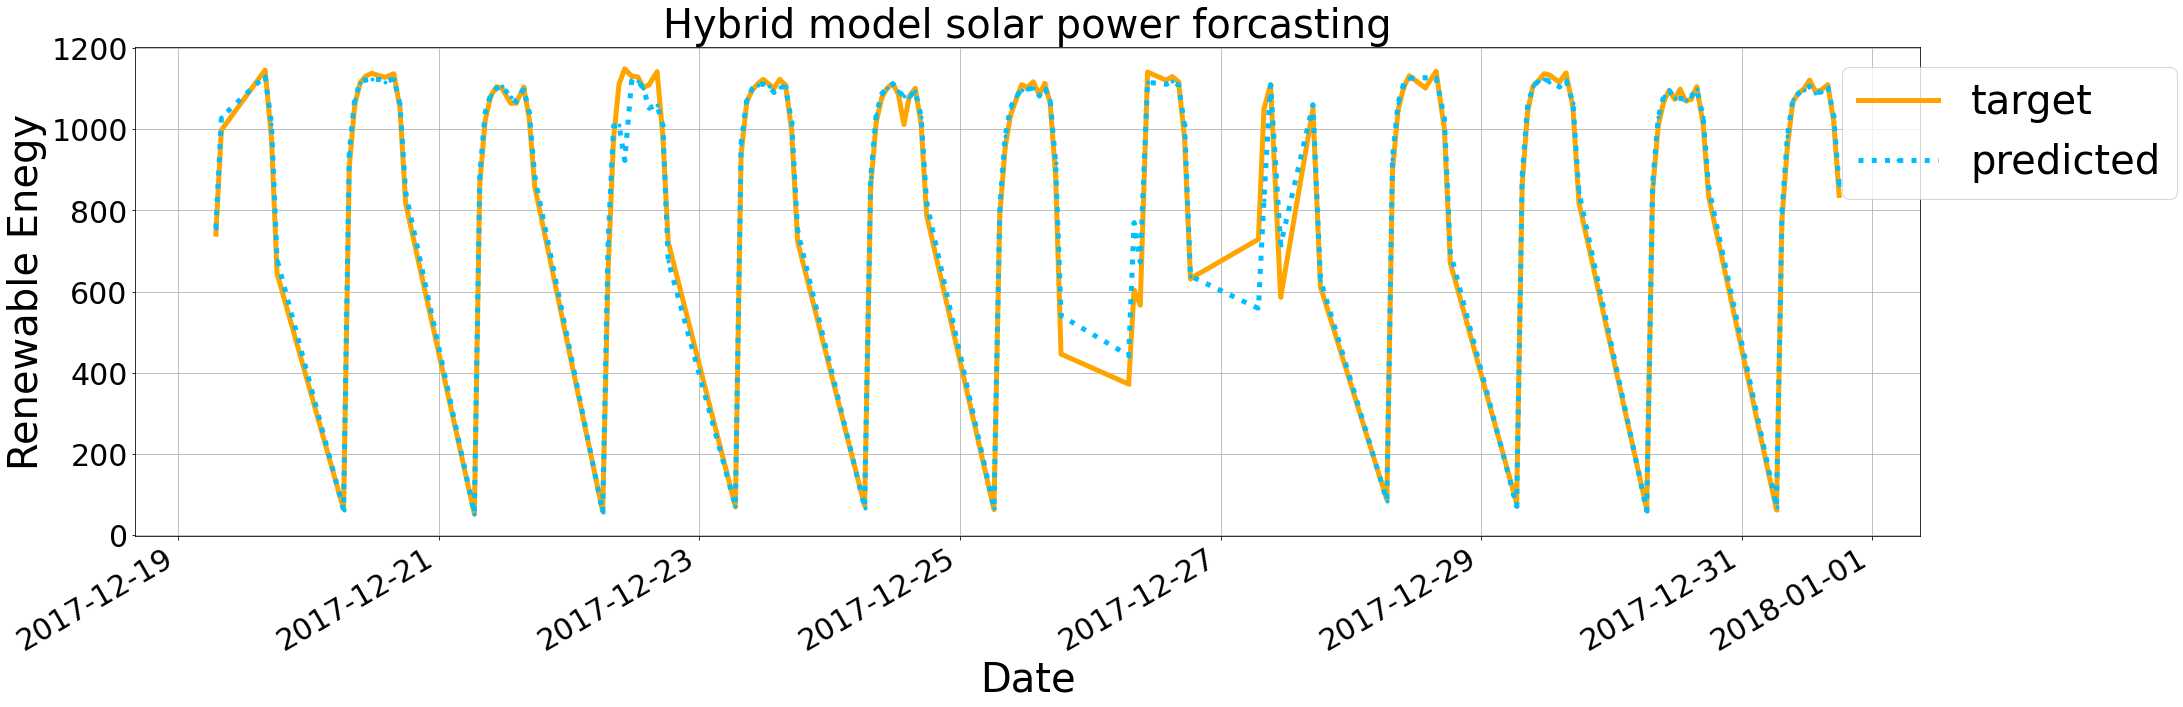

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-74-4561cf7068e8>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


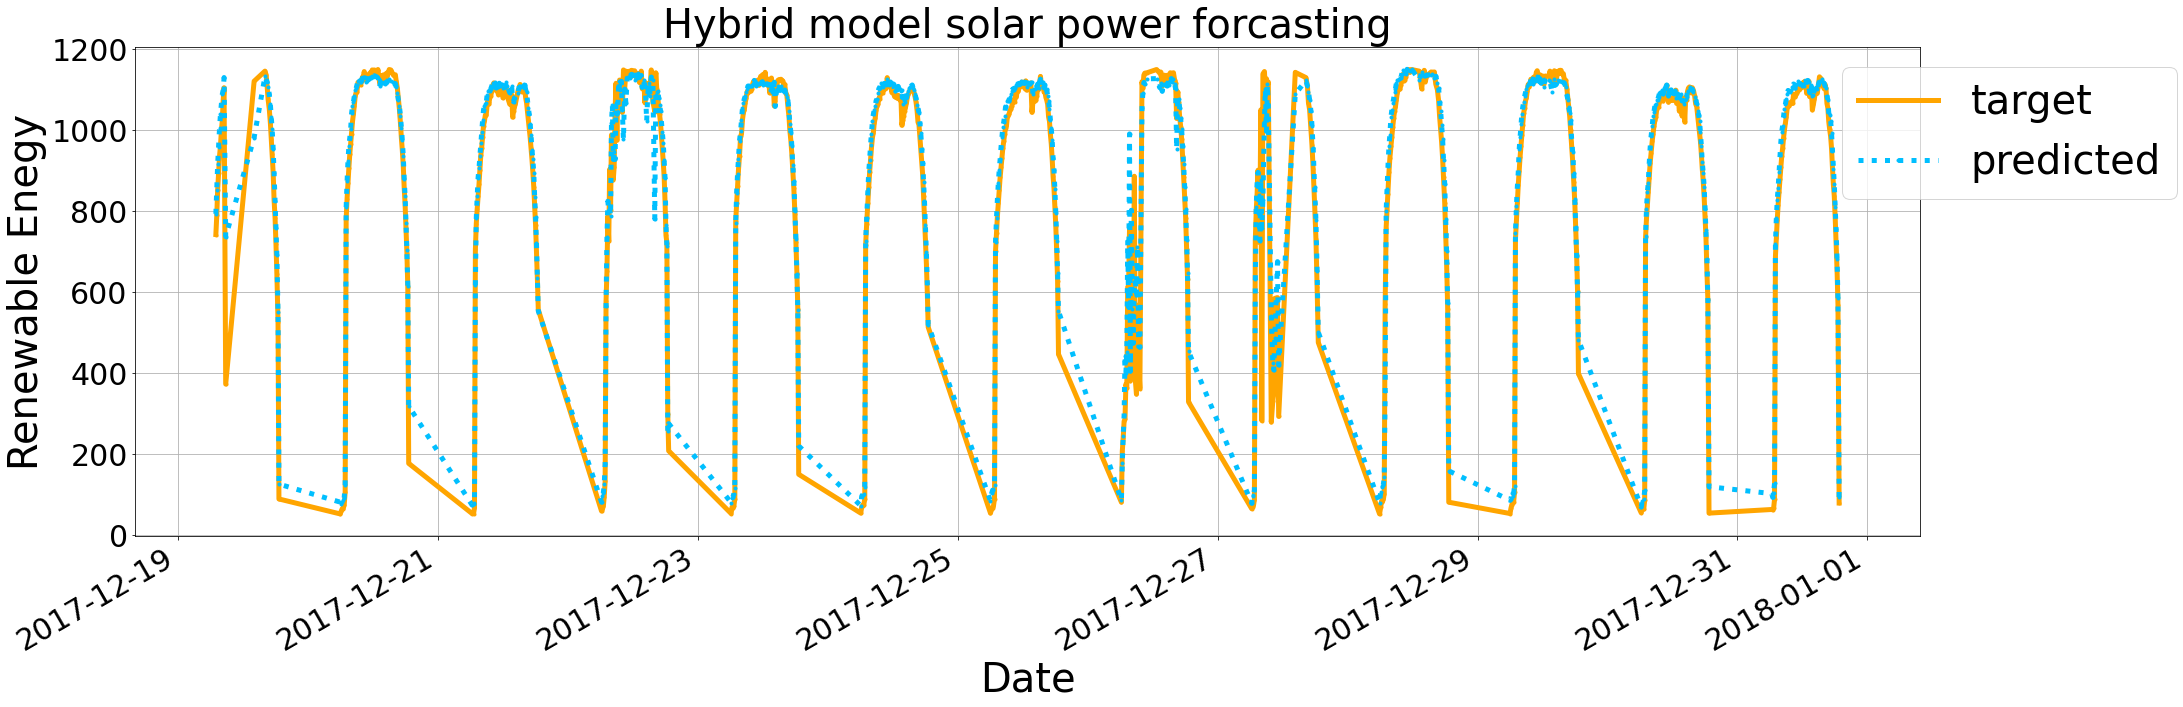

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalt.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalt.Pred_LSTM,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-75-c92b35558d46>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


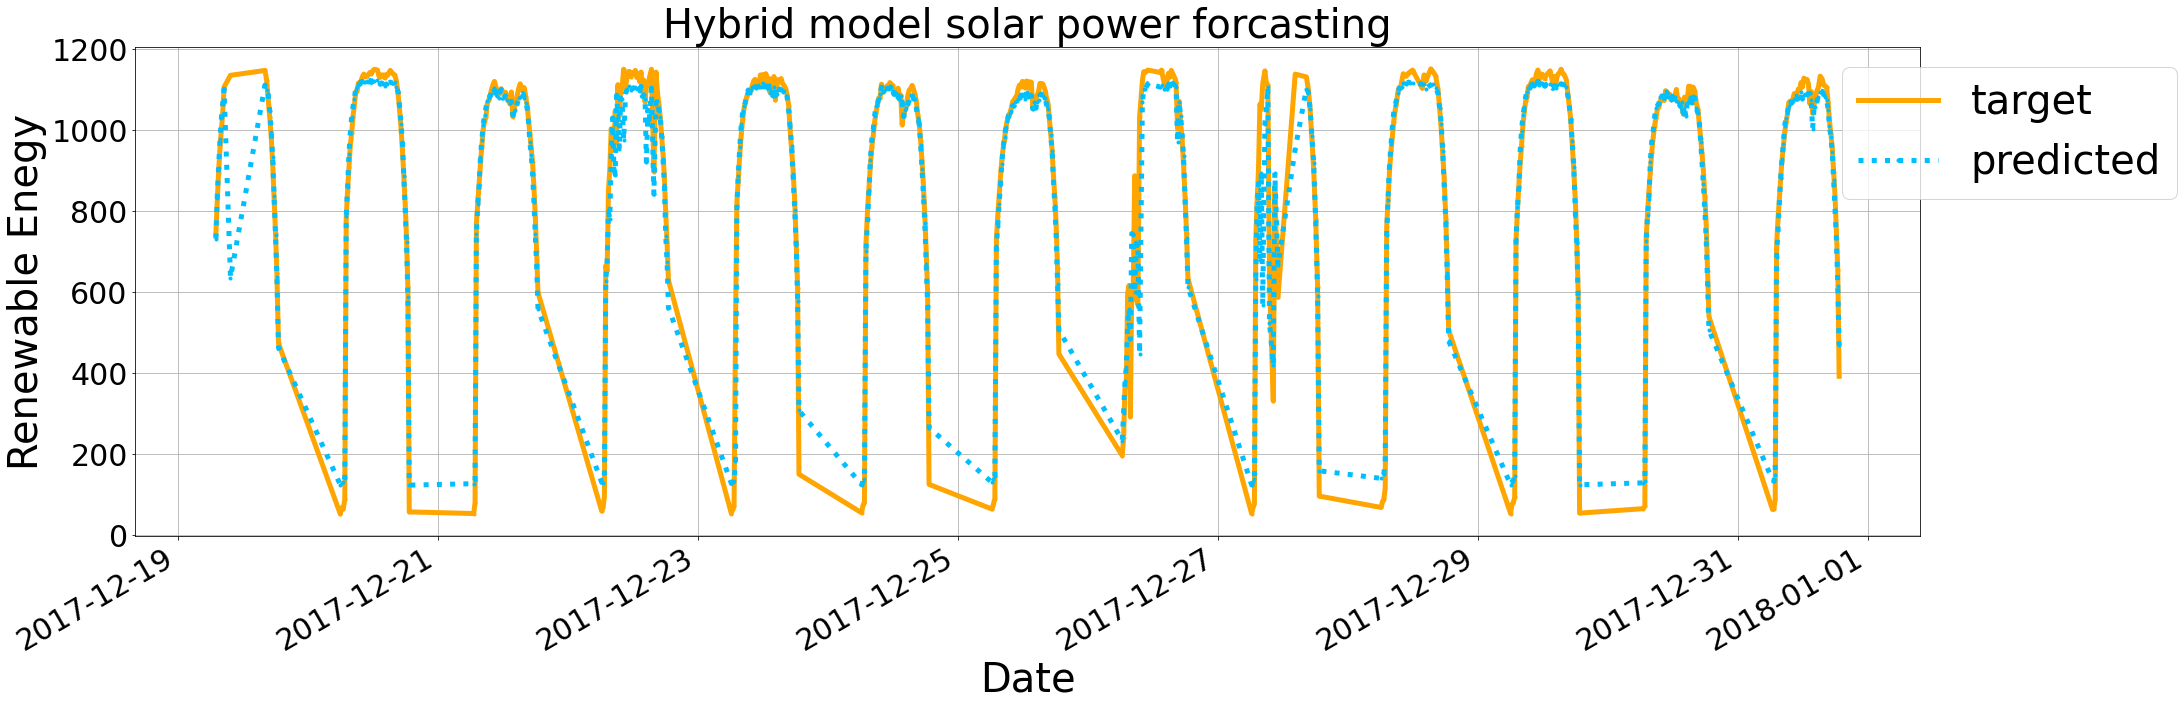

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalft.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalft.Pred_BILSTM,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-59-3ef51c03a102>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


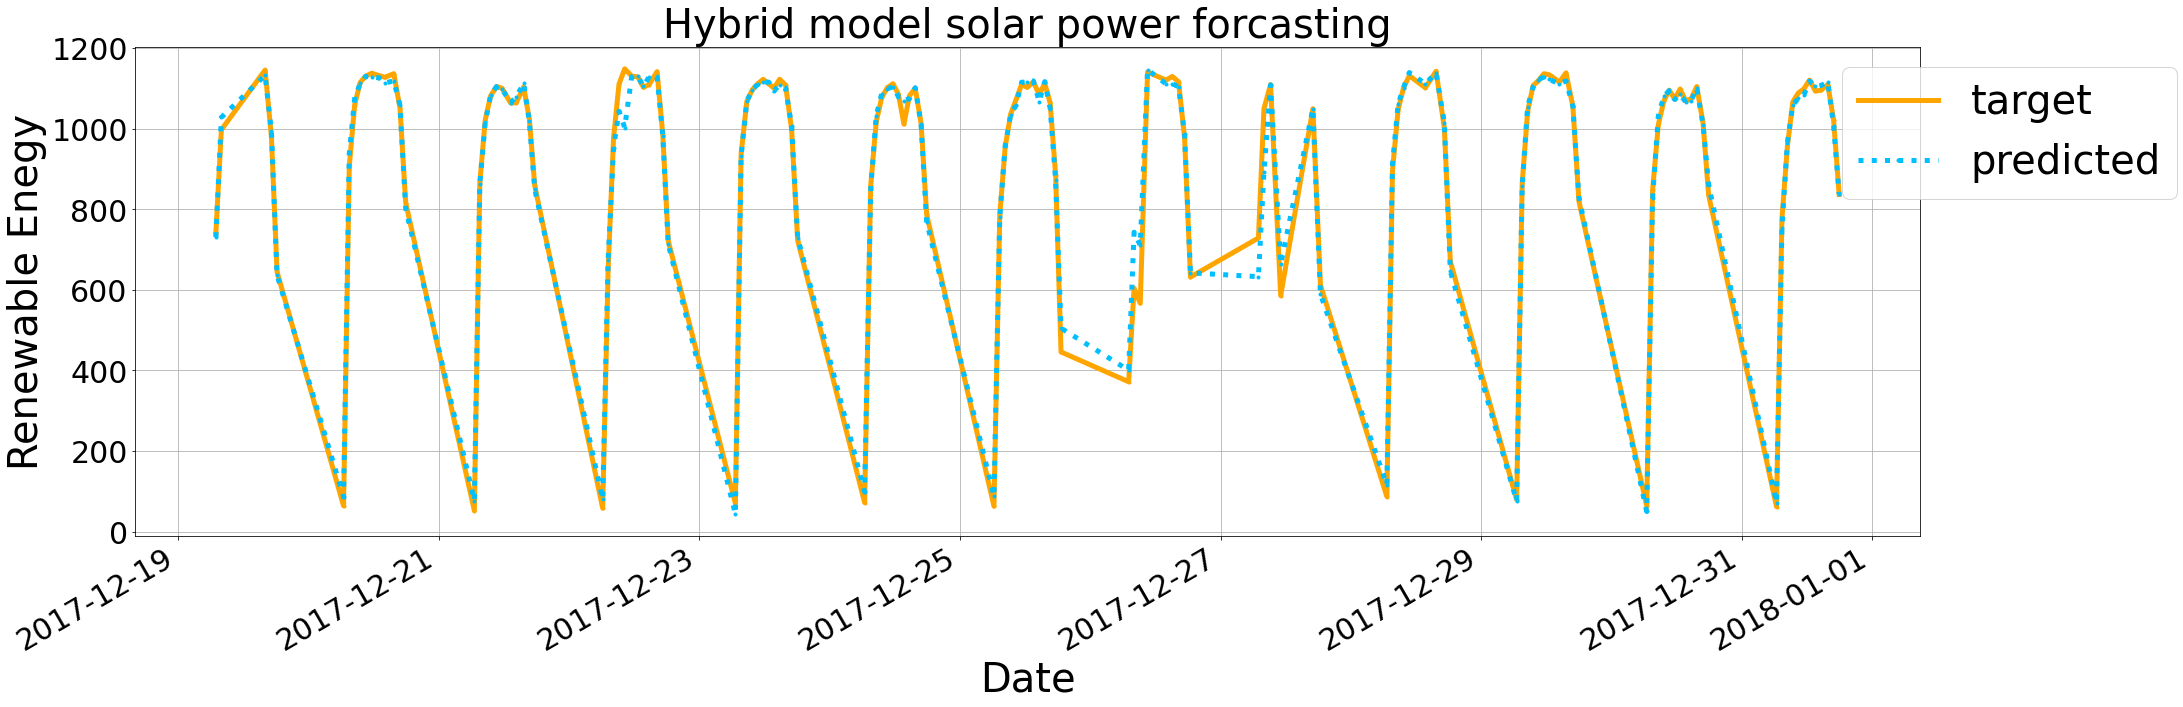

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df_finalh.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df_finalh.Pred_GRU,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

**Full model_Predictions**
---

<ipython-input-5-4f2fbdcc69b8>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


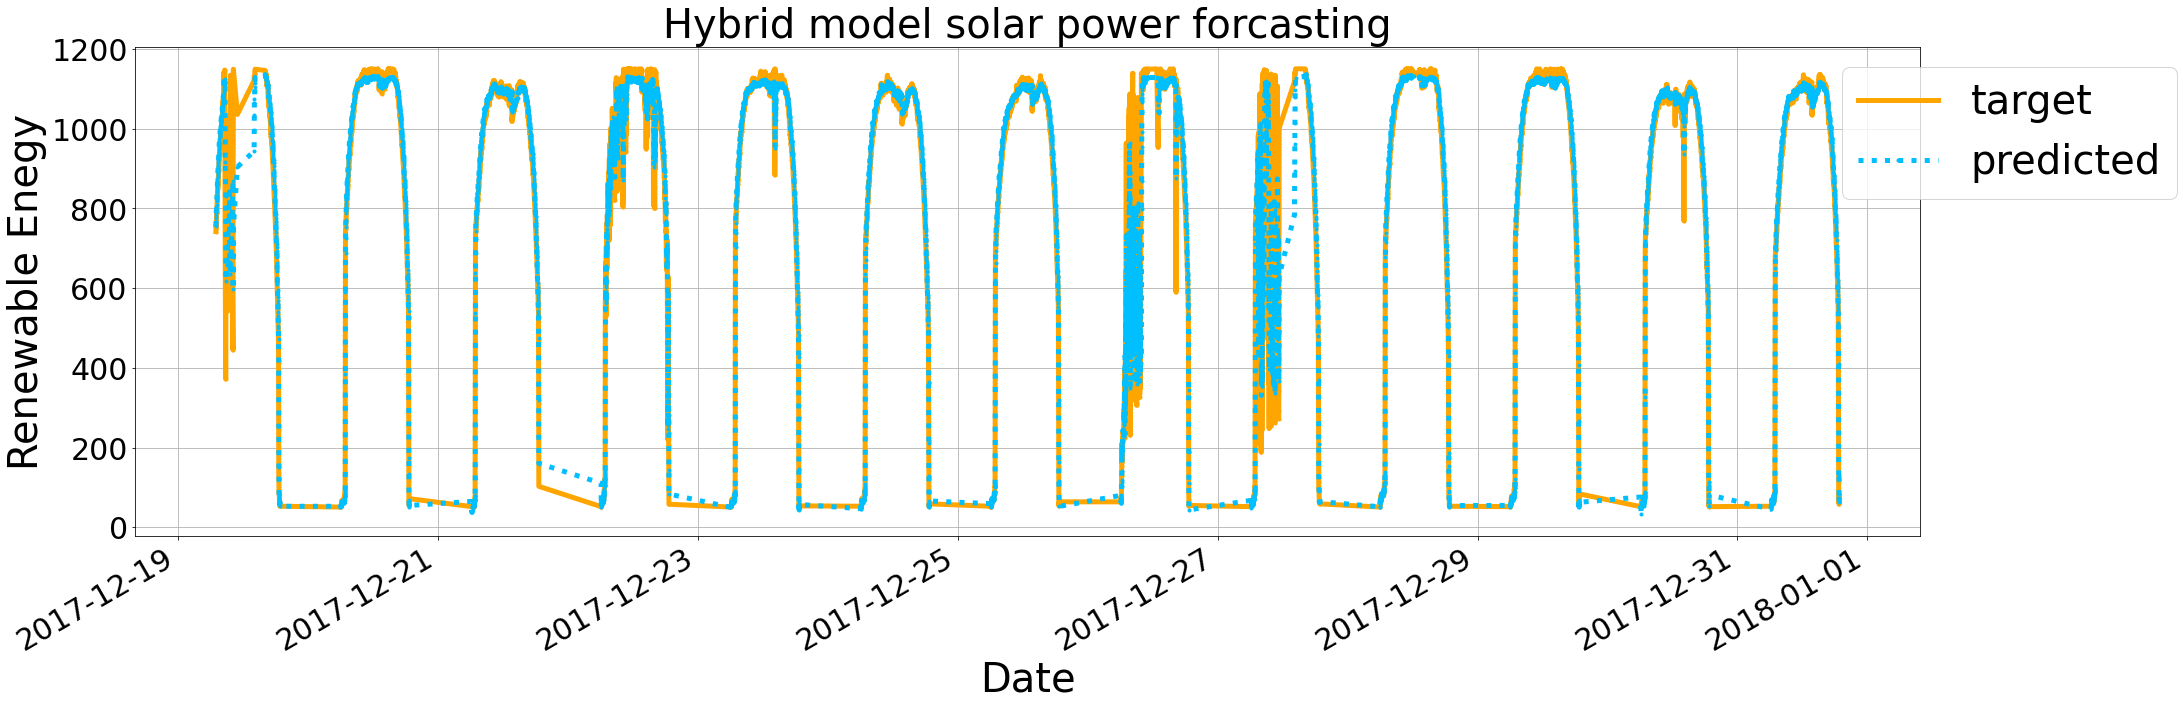

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('Hybrid model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

LSTM

<ipython-input-6-fa987c2d3524>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


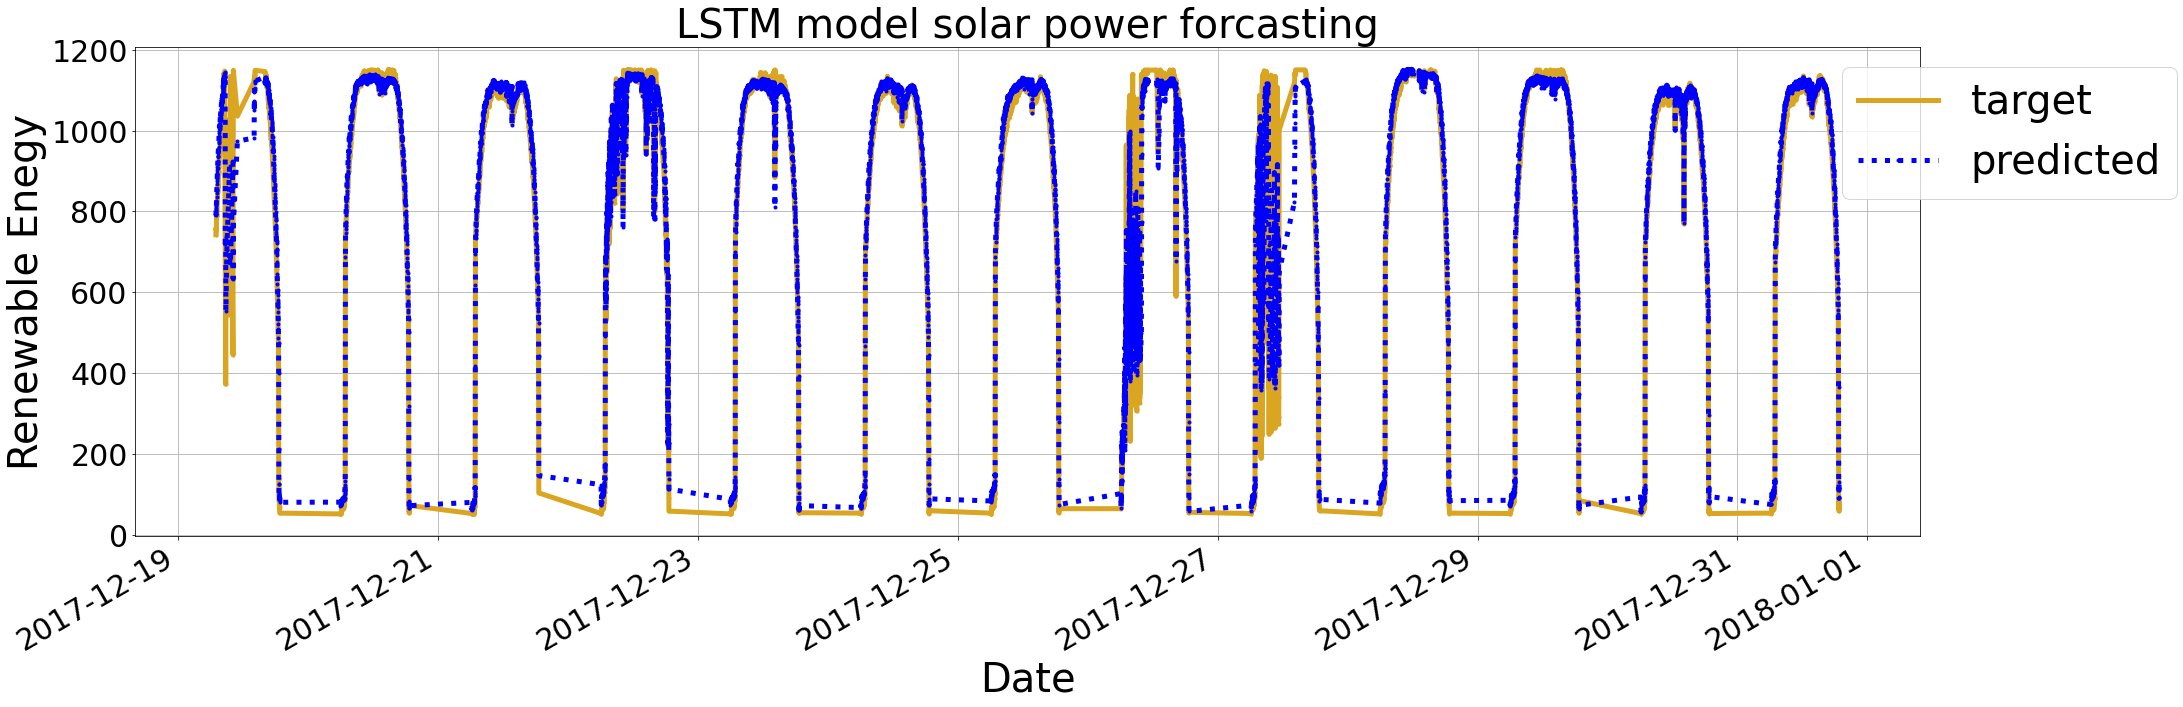

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='goldenrod',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df.Pred_LSTM,label='predicted',color='blue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('LSTM model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

BILSTM

<ipython-input-7-1f15589affbc>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


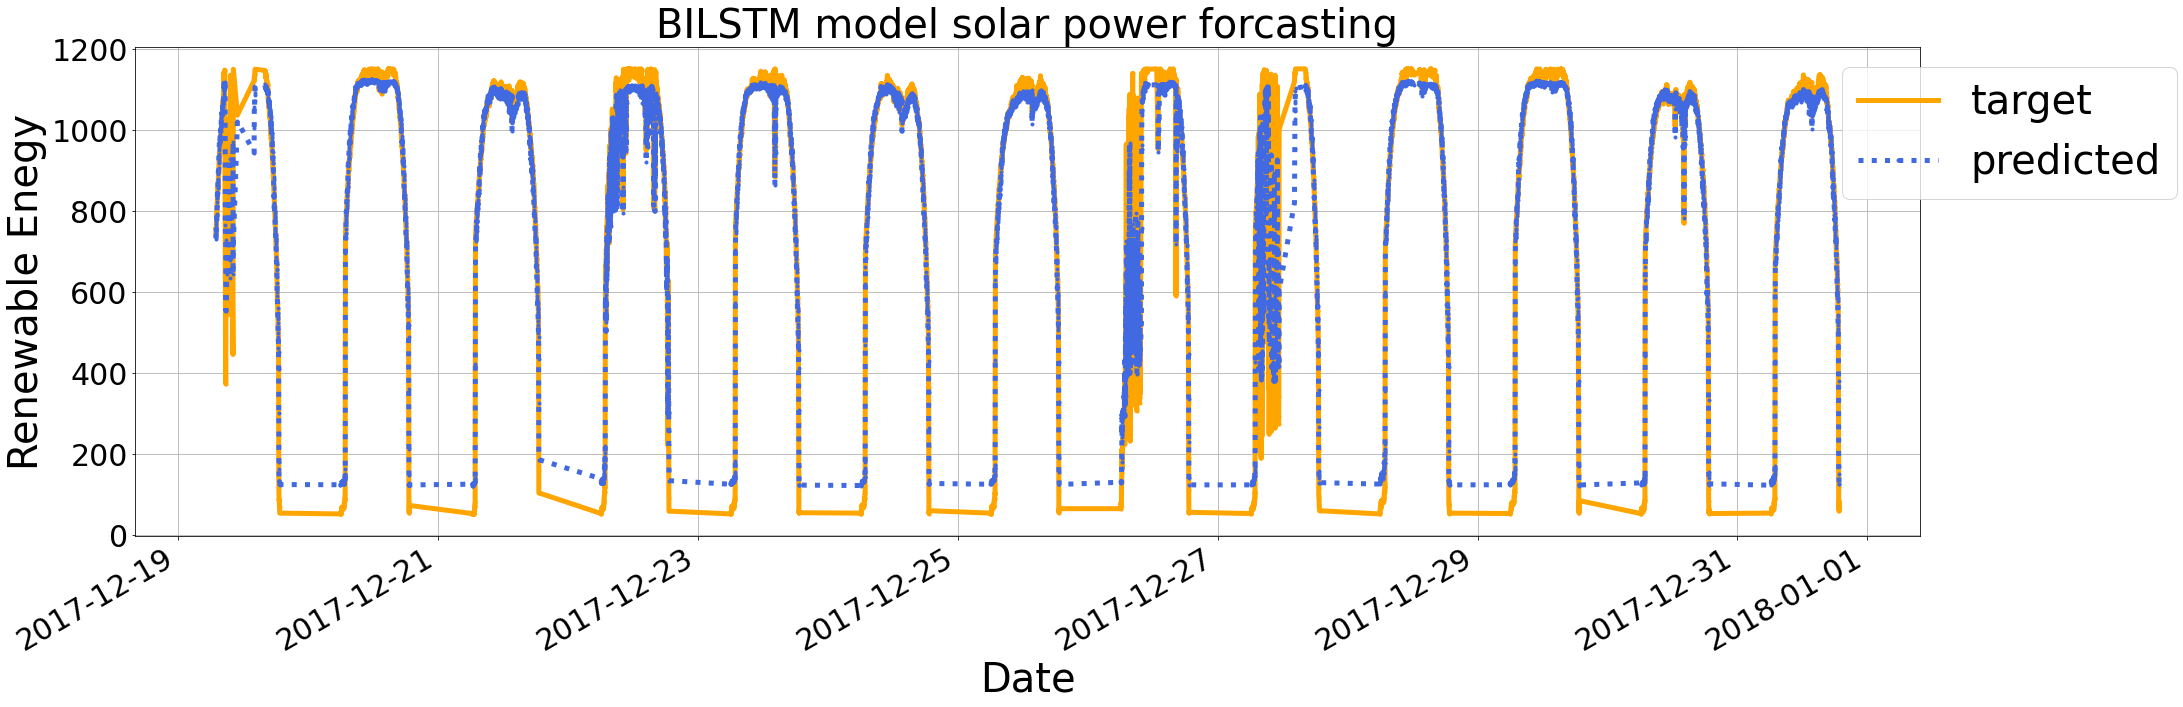

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='orange',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df.Pred_BILSTM,label='predicted',color='royalblue',marker='.',linestyle=':',linewidth=5)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size': 40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('BILSTM model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

**GRU**

<ipython-input-9-65d09288cf2f>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "plot_pathbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(plot_path,plot_pathbbox_inches='tight')


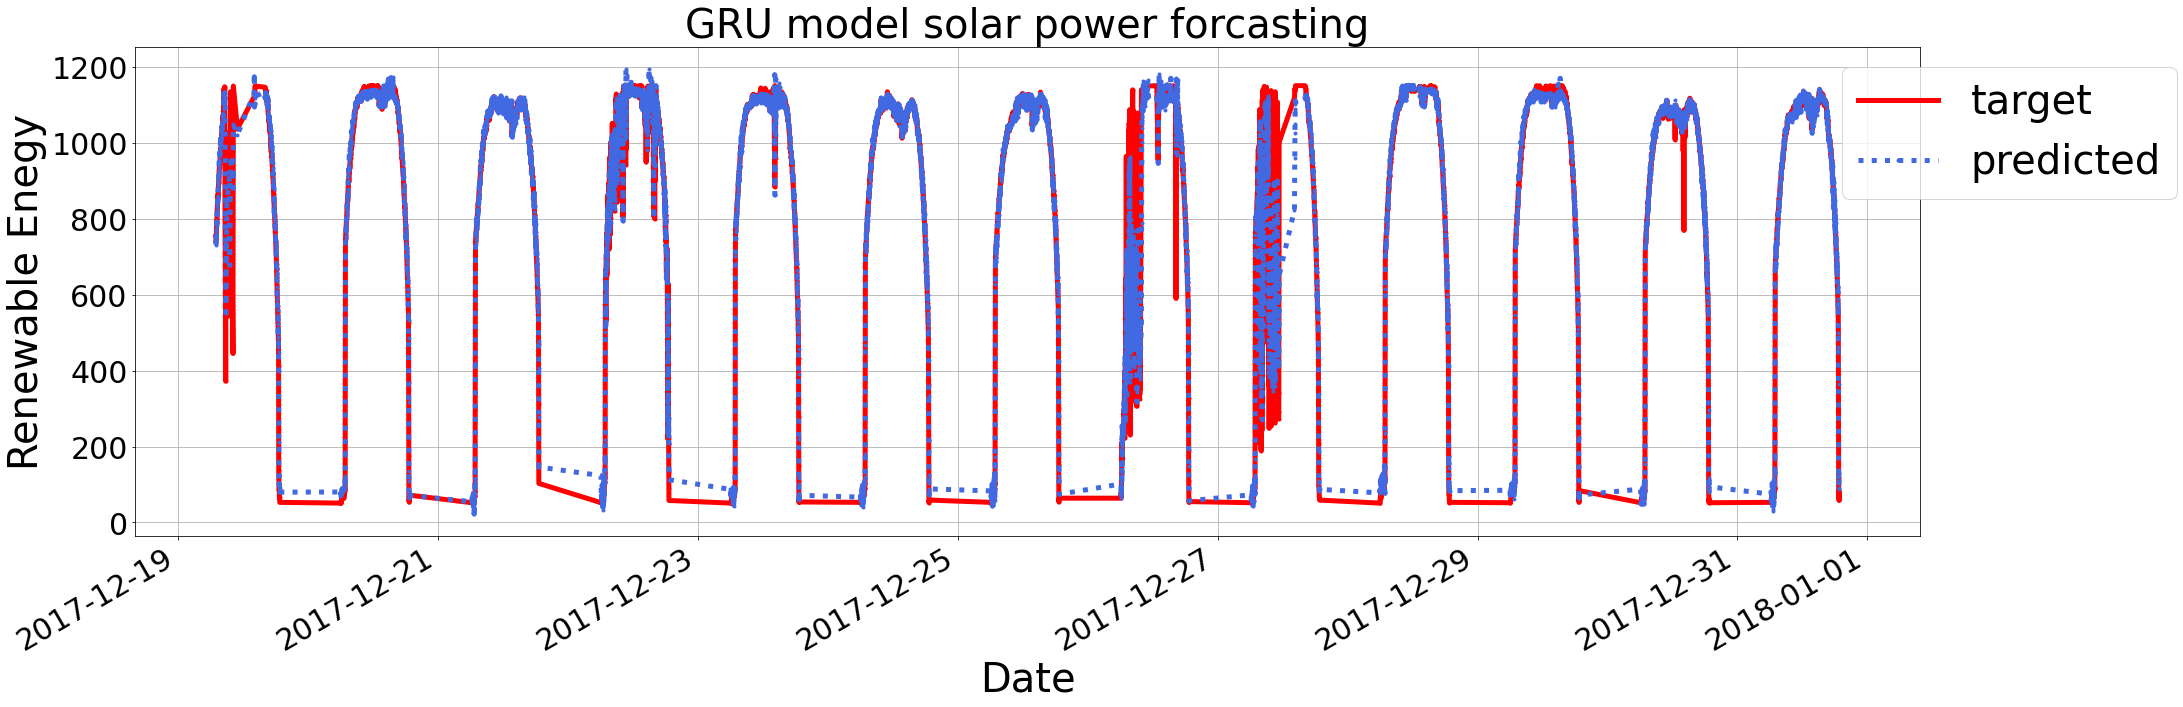

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(32,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='red',marker='.',linestyle='-',linewidth=5)
predictedPlot,=plt.plot(df.Pred_GRU,label='predicted',color='royalblue',marker='.',linestyle=':',linewidth=5)
plt.ylabel('Renewable Enegy',fontsize=40)
plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ion()
plt.grid()
plt.gcf().autofmt_xdate()
plt.legend(handles=[targetPlot, predictedPlot],prop={'size':40},bbox_to_anchor=(1.05,1.0),loc='upper center')
plt.title('GRU model solar power forcasting',fontsize=40,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)